In [1]:
import tensorflow as tf
physical_devices = tf.config.experimental.list_physical_devices('GPU')
assert len(physical_devices) > 0, "Not enough GPU hardware devices available"
#import tensorflow as tf
#tf.config.experimental.set_memory_growth(tf.config.list_physical_devices('GPU')[0], True)

In [2]:
import matplotlib.pylab as plt
!pip install netCDF4
#!pip install xarray
#!pip install -U matplotlib==3.2
#!pip uninstall -y numpy
#!pip install numpy
#!pip install pyproj==1.9.6
#!apt-get install libgeos-3.5.0
#!apt-get install libgeos-dev
#!pip install https://github.com/matplotlib/basemap/archive/master.zip
#!pip install sdv
from netCDF4 import Dataset, num2date
import pandas as pd
#from matplotlib.cbook import dedent
#from mpl_toolkits.basemap import Basemap
import numpy as np
%matplotlib inline
import xarray
import netCDF4 as nc
#conda install xarray or pip install xarray

In [3]:
#reshape_ocean_df=pd.read_csv('/gpu_deep/Deep_Ocean/reshape_ocean_df_full.csv')
reshape_ocean_df_no_ssh=pd.read_csv('/gpu_deep/Deep_Ocean/reshape_ocean_df_no_ssh.csv')
reshape_ocean_df=pd.read_csv('/gpu_deep/Deep_Ocean/reshape_ocean_df.csv')

In [20]:
reshape_ocean_df_1965_no_ssh=reshape_ocean_df_no_ssh[reshape_ocean_df_no_ssh["DATE"]>'1965-01-01']

## Preparing Test Dataset 

In [5]:
reshape_ocean_df_1965_no_ssh_test=reshape_ocean_df_1965_no_ssh[(reshape_ocean_df_1965_no_ssh["DATE"]>'2012-01-01')&(reshape_ocean_df_1965_no_ssh["DATE"]<'2018-01-01')]
reshape_ocean_df_1965_test=reshape_ocean_df_1965_no_ssh_test[['Station-Point','DATE','0','10','20','30','50','75','100','125','150','200','250','300']]

In [6]:
#reshape_ocean_df_1965_test

In [7]:
reshape_ocean_df_test_1965_FEB=reshape_ocean_df_1965_no_ssh_test[reshape_ocean_df_1965_no_ssh_test['DATE'].str.contains("-02-")]
reshape_ocean_df_test_1965_APR=reshape_ocean_df_1965_no_ssh_test[reshape_ocean_df_1965_no_ssh_test['DATE'].str.contains("-04-")]
reshape_ocean_df_test_1965_JUN=reshape_ocean_df_1965_no_ssh_test[reshape_ocean_df_1965_no_ssh_test['DATE'].str.contains("-06-")]
reshape_ocean_df_test_1965_AUG=reshape_ocean_df_1965_no_ssh_test[reshape_ocean_df_1965_no_ssh_test['DATE'].str.contains("-08-")]
reshape_ocean_df_test_1965_OCT=reshape_ocean_df_1965_no_ssh_test[reshape_ocean_df_1965_no_ssh_test['DATE'].str.contains("-10-")]
reshape_ocean_df_test_1965_DEC=reshape_ocean_df_1965_no_ssh_test[reshape_ocean_df_1965_no_ssh_test['DATE'].str.contains("-12-")]

In [8]:
#reshape_ocean_df_test_1965_DEC

In [9]:
reshape_ocean_df_1965_no_ssh=reshape_ocean_df_no_ssh[(reshape_ocean_df_no_ssh["DATE"]>'1965-01-01')&(reshape_ocean_df_no_ssh["DATE"]<'2012-01-01')]
reshape_ocean_df_1965=reshape_ocean_df_1965_no_ssh[['Station-Point','DATE','0','10','20','30','50','75','100','125','150','200','250','300']]

In [10]:
#reshape_ocean_df_1965

## Seasonal Dataset 1965_dataaset (Spring, Summer, Autumn, Winter)

In [11]:
reshape_ocean_df_1965_FEB=reshape_ocean_df_1965_no_ssh[reshape_ocean_df_1965_no_ssh['DATE'].str.contains("-02-")]
reshape_ocean_df_1965_APR=reshape_ocean_df_1965_no_ssh[reshape_ocean_df_1965_no_ssh['DATE'].str.contains("-04-")]
reshape_ocean_df_1965_JUN=reshape_ocean_df_1965_no_ssh[reshape_ocean_df_1965_no_ssh['DATE'].str.contains("-06-")]
reshape_ocean_df_1965_AUG=reshape_ocean_df_1965_no_ssh[reshape_ocean_df_1965_no_ssh['DATE'].str.contains("-08-")]
reshape_ocean_df_1965_OCT=reshape_ocean_df_1965_no_ssh[reshape_ocean_df_1965_no_ssh['DATE'].str.contains("-10-")]
reshape_ocean_df_1965_DEC=reshape_ocean_df_1965_no_ssh[reshape_ocean_df_1965_no_ssh['DATE'].str.contains("-12-")]

In [12]:
#reshape_ocean_df_1965_FEB

## Seasonal Dataset  (Spring, Summer, Autumn, Winter)

In [13]:
reshape_ocean_df_ssh=reshape_ocean_df
reshape_ocean_df_ssh=reshape_ocean_df[(reshape_ocean_df["DATE"]>'1993-01-01')&(reshape_ocean_df["DATE"]<'2013-01-01')]

In [22]:
reshape_ocean_df_ssh=reshape_ocean_df_ssh.dropna()

In [23]:
reshape_ocean_df_ssh

,DATE,Station-Point,Latitude,Longitude,0,10,20,30,50,75,100,125,150,200,250,300,400,500,SSH
1,1993-04-16,104-07,37.0567,130.0,13.3900,12.7900,12.4400,12.1200,11.0000,7.8500,4.7000,3.2100,2.1100,1.5300,1.2700,1.2400,0.9900,0.8000,0.5627
2,1993-06-02,104-07,37.0567,130.0,18.9100,18.4000,15.2100,11.6900,8.6500,5.8800,4.5600,2.3200,1.7200,1.3100,1.1000,0.9800,0.8200,0.7500,0.5553
3,1993-08-17,104-07,37.0567,130.0,20.2800,18.8200,17.3900,13.9500,7.7100,5.2500,3.6500,2.9000,2.2700,1.4600,1.4600,1.1700,0.8000,0.6200,0.4027
4,1993-10-27,104-07,37.0567,130.0,18.5500,18.4000,18.3500,18.2900,17.3000,16.0900,11.7200,10.5700,9.4500,5.6100,3.0600,1.8100,1.0500,0.8500,0.6760
5,1993-12-16,104-07,37.0567,130.0,12.4100,12.4100,12.3100,12.3100,11.2400,10.4300,8.9500,7.7600,7.4400,5.6100,4.4500,2.5800,1.3800,0.7500,0.4738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2303,2012-04-07,107-07,38.2100,130.0,7.2435,7.2482,7.1691,7.1543,7.1461,7.1135,5.3708,2.8265,2.0889,1.5004,1.1775,1.0015,0.7554,0.6425,0.4388
2304,2012-06-29,107-07,38.2100,130.0,21.2183,18.8585,12.7813,9.7589,5.8134,3.5280,2.4385,1.7777,1.4541,1.1973,1.0443,0.9072,0.7076,0.5878,0.4875
2305,2012-08-21,107-07,38.2100,130.0,25.3148,25.3099,15.7167,13.3564,6.8327,4.0751,2.4039,1.8203,1.4802,1.1713,1.0056,0.8619,0.6884,0.5800,0.6290
2306,2012-10-05,107-07,38.2100,130.0,19.9044,19.8322,17.2033,14.4120,8.7710,3.8223,2.4153,1.6305,1.3753,1.0793,0.9115,0.8174,0.5990,0.5154,0.6352


## Preparing Test Dataset

In [24]:
reshape_ocean_df_test_ssh=reshape_ocean_df[(reshape_ocean_df["DATE"]>'2013-01-01')&(reshape_ocean_df["DATE"]<'2018-01-01')]

In [25]:
#reshape_ocean_df_test_ssh

In [26]:
reshape_ocean_df_test_FEB=reshape_ocean_df_test_ssh[reshape_ocean_df_test_ssh['DATE'].str.contains("-02-")]
reshape_ocean_df_test_APR=reshape_ocean_df_test_ssh[reshape_ocean_df_test_ssh['DATE'].str.contains("-04-")]
reshape_ocean_df_test_JUN=reshape_ocean_df_test_ssh[reshape_ocean_df_test_ssh['DATE'].str.contains("-06-")]
reshape_ocean_df_test_AUG=reshape_ocean_df_test_ssh[reshape_ocean_df_test_ssh['DATE'].str.contains("-08-")]
reshape_ocean_df_test_OCT=reshape_ocean_df_test_ssh[reshape_ocean_df_test_ssh['DATE'].str.contains("-10-")]
reshape_ocean_df_test_DEC=reshape_ocean_df_test_ssh[reshape_ocean_df_test_ssh['DATE'].str.contains("-12-")]

In [27]:
#reshape_ocean_df_test_FEB

In [28]:
#reshape_ocean_df_ssh

## Preparing Train Dataset

In [29]:
reshape_ocean_df_FEB=reshape_ocean_df_ssh[reshape_ocean_df_ssh['DATE'].str.contains("-02-")]
reshape_ocean_df_APR=reshape_ocean_df_ssh[reshape_ocean_df_ssh['DATE'].str.contains("-04-")]
reshape_ocean_df_JUN=reshape_ocean_df_ssh[reshape_ocean_df_ssh['DATE'].str.contains("-06-")]
reshape_ocean_df_AUG=reshape_ocean_df_ssh[reshape_ocean_df_ssh['DATE'].str.contains("-08-")]
reshape_ocean_df_OCT=reshape_ocean_df_ssh[reshape_ocean_df_ssh['DATE'].str.contains("-10-")]
reshape_ocean_df_DEC=reshape_ocean_df_ssh[reshape_ocean_df_ssh['DATE'].str.contains("-12-")]

In [30]:
#reshape_ocean_df_FEB

## Compare distribution of 1965_FEB vs 1993_FEB

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


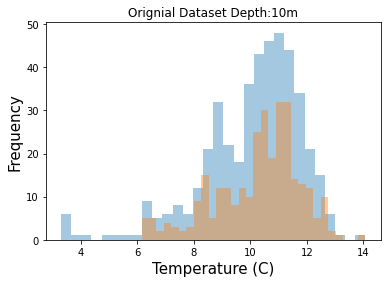

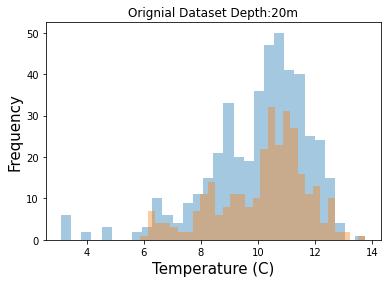

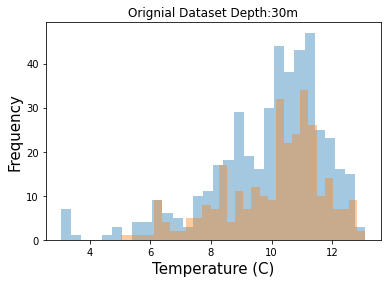

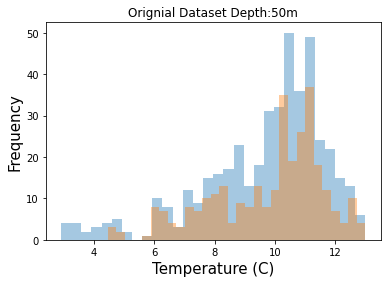

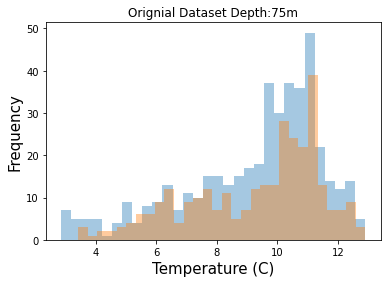

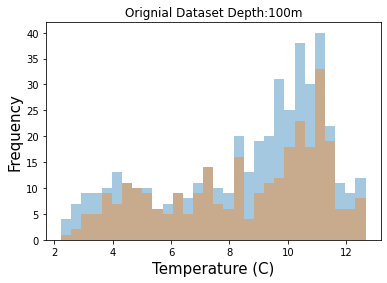

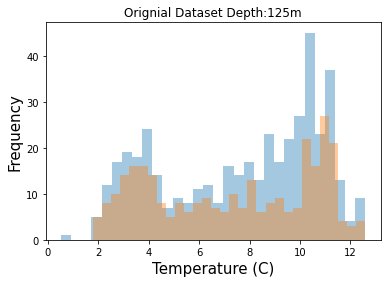

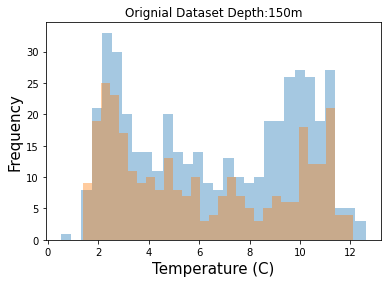

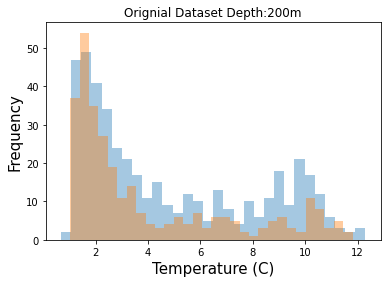

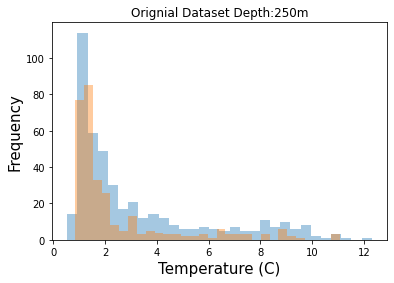

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns


for depth in ['10','20','30','50','75','100','125','150','200','250']:
    #reshape_ocean_df_1965_FEB[[depth]].hist(bins=50,grid=False, xlabelsize=12, ylabelsize=12)
    sns.distplot(reshape_ocean_df_1965_FEB[depth],bins=30,kde=False)
    sns.distplot(reshape_ocean_df_FEB[depth],bins=30,kde=False)
    plt.xlabel("Temperature (C)", fontsize=15)
    plt.ylabel("Frequency",fontsize=15)
    plt.title('Orignial Dataset Depth:'+depth+'m')
    plt.show()
    #sns.distplot(reshape_ocean_df_1965_FEB[depth], kde=False, color='red', bins=30)


In [32]:
from sdv.constraints import GreaterThan
depth_temp_0_10_const = GreaterThan(
low='10',
high='0',
handling_strategy='reject_sampling')
#0	10	20	30	50	75	100	125	150	200	250	300	400	500
depth_temp_20_10_const = GreaterThan(
low='20',
high='10',
handling_strategy='reject_sampling')

depth_temp_30_20_const = GreaterThan(
low='30',
high='20',
handling_strategy='reject_sampling')

depth_temp_50_30_const = GreaterThan(
low='50',
high='30',
handling_strategy='reject_sampling')

depth_temp_75_50_const = GreaterThan(
low='75',
high='50',
handling_strategy='reject_sampling')

depth_temp_100_75_const = GreaterThan(
low='100',
high='75',
handling_strategy='reject_sampling')

depth_temp_125_100_const = GreaterThan(
low='125',
high='100',
handling_strategy='reject_sampling')

depth_temp_150_125_const = GreaterThan(
low='150',
high='125',
handling_strategy='reject_sampling')


depth_temp_200_150_const = GreaterThan(
low='200',
high='150',
handling_strategy='reject_sampling')


depth_temp_250_200_const = GreaterThan(
low='250',
high='200',
handling_strategy='reject_sampling')

depth_temp_300_250_const = GreaterThan(
low='300',
high='250',
handling_strategy='reject_sampling')

depth_temp_400_300_const = GreaterThan(
low='400',
high='300',
handling_strategy='reject_sampling')

depth_temp_500_400_const = GreaterThan(
low='500',
high='400',
handling_strategy='reject_sampling')

constraints_upper = [depth_temp_0_10_const,
                     depth_temp_20_10_const,
                     depth_temp_30_20_const,
                     depth_temp_50_30_const,
                     depth_temp_75_50_const,
                     depth_temp_100_75_const,
                     depth_temp_125_100_const,
                     depth_temp_150_125_const,
                     depth_temp_200_150_const,
                     depth_temp_250_200_const,
                     depth_temp_300_250_const,
                     depth_temp_400_300_const,
                     depth_temp_500_400_const]

constraints_upper2 = [depth_temp_0_10_const,
                     depth_temp_20_10_const,
                     depth_temp_30_20_const,
                     depth_temp_50_30_const,
                     depth_temp_75_50_const,
                     depth_temp_100_75_const,
                     depth_temp_125_100_const,
                     depth_temp_150_125_const,
                     depth_temp_200_150_const,
                     depth_temp_250_200_const,
                     depth_temp_300_250_const]



depth_temp_20_0_const = GreaterThan(
low='20',
high='0',
handling_strategy='reject_sampling')

depth_temp_50_20_const = GreaterThan(
low='50',
high='0',
handling_strategy='reject_sampling')


depth_temp_100_50_const = GreaterThan(
low='100',
high='50',
handling_strategy='reject_sampling')


depth_temp_150_100_const = GreaterThan(
low='150',
high='100',
handling_strategy='reject_sampling')


depth_temp_200_150_const = GreaterThan(
low='200',
high='150',
handling_strategy='reject_sampling')


constraints_upper3 = [depth_temp_20_0_const,
                      depth_temp_50_20_const,
                      depth_temp_100_50_const]

In [33]:
from sdv.tabular import CopulaGAN
from sdv.tabular import GaussianCopula
from sdv.tabular import TVAE
#model_upper = CopulaGAN(constraints=constraints_upper)
#model=CopulaGAN()
#model_upper.fit(ocean_train_upper)
#model.fit(reshape_ocean_df_1965)
#model_upper.sample(100, max_retries=100000, conditions=conditions)
#model_output=model.sample(1000, max_retries=1000000)
#reshape_ocean_df_1965.hist()
#model_output.hist()

#model=CopulaGAN(constraints=constraints_upper3)

model=TVAE()

for mon in ['FEB','APR','JUN','AUG','OCT','DEC']:
    model.fit(globals()['reshape_ocean_df_1965_'+mon])
    model_output=model.sample(2000, max_retries=1000000)
    model_output['10']=np.where((model_output['10']>model_output['0']),model_output['0'],model_output['10'])
    model_output['20']=np.where((model_output['20']>model_output['10']),model_output['10'],model_output['20'])
    model_output['30']=np.where((model_output['30']>model_output['20']),model_output['20'],model_output['30'])
    model_output['50']=np.where((model_output['50']>model_output['30']),model_output['30'],model_output['50'])
    model_output['75']=np.where((model_output['75']>model_output['50']),model_output['50'],model_output['75'])
    model_output['100']=np.where((model_output['100']>model_output['75']),model_output['75'],model_output['100'])
    model_output['125']=np.where((model_output['125']>model_output['100']),model_output['100'],model_output['125'])
    model_output['150']=np.where((model_output['150']>model_output['125']),model_output['125'],model_output['150'])
    model_output['200']=np.where((model_output['200']>model_output['150']),model_output['150'],model_output['200'])
    model_output['250']=np.where((model_output['250']>model_output['200']),model_output['200'],model_output['250'])  
    globals()['model_output_1965_'+mon]=model_output
    
#model=CopulaGAN(constraints=constraints_upper3)
model=TVAE()
for mon in ['FEB','APR','JUN','AUG','OCT','DEC']:
    model.fit(globals()['reshape_ocean_df_'+mon])
    model_output=model.sample(2000, max_retries=1000000)
    model_output['10']=np.where((model_output['10']>model_output['0']),model_output['0'],model_output['10'])
    model_output['20']=np.where((model_output['20']>model_output['10']),model_output['10'],model_output['20'])
    model_output['30']=np.where((model_output['30']>model_output['20']),model_output['20'],model_output['30'])
    model_output['50']=np.where((model_output['50']>model_output['30']),model_output['30'],model_output['50'])
    model_output['75']=np.where((model_output['75']>model_output['50']),model_output['50'],model_output['75'])
    model_output['100']=np.where((model_output['100']>model_output['75']),model_output['75'],model_output['100'])
    model_output['125']=np.where((model_output['125']>model_output['100']),model_output['100'],model_output['125'])
    model_output['150']=np.where((model_output['150']>model_output['125']),model_output['125'],model_output['150'])
    model_output['200']=np.where((model_output['200']>model_output['150']),model_output['150'],model_output['200'])
    model_output['250']=np.where((model_output['250']>model_output['200']),model_output['200'],model_output['250'])  
    globals()['model_output_df_'+mon]=model_output
    globals()['temp_tvae_model_output_df_'+mon]=model_output

    
model=GaussianCopula(constraints=constraints_upper3)
for mon in ['FEB','APR','JUN','AUG','OCT','DEC']:
    model.fit(globals()['reshape_ocean_df_'+mon])
    model_output=model.sample(2000, max_retries=1000000)
    model_output['10']=np.where((model_output['10']>model_output['0']),model_output['0'],model_output['10'])
    model_output['20']=np.where((model_output['20']>model_output['10']),model_output['10'],model_output['20'])
    model_output['30']=np.where((model_output['30']>model_output['20']),model_output['20'],model_output['30'])
    model_output['50']=np.where((model_output['50']>model_output['30']),model_output['30'],model_output['50'])
    model_output['75']=np.where((model_output['75']>model_output['50']),model_output['50'],model_output['75'])
    model_output['100']=np.where((model_output['100']>model_output['75']),model_output['75'],model_output['100'])
    model_output['125']=np.where((model_output['125']>model_output['100']),model_output['100'],model_output['125'])
    model_output['150']=np.where((model_output['150']>model_output['125']),model_output['125'],model_output['150'])
    model_output['200']=np.where((model_output['200']>model_output['150']),model_output['150'],model_output['200'])
    model_output['250']=np.where((model_output['250']>model_output['200']),model_output['200'],model_output['250'])
    globals()['model_output_df_'+mon]=pd.concat([model_output,pd.DataFrame(globals()['temp_tvae_model_output_df_'+mon])])
    #globals()['model_output_df_'+mon]=model_output    
    

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWa

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments w

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments w

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments w

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuse

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWa

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments w

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), Conver

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWa

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate da

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/scipy/optimize/optimize.py:283: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  "minimize step, clipping to bounds", RuntimeWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:621: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/home/gisuser/.co

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:5003: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2494: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:621: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/scipy/optimize/optimize.py:283: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  "minimize step, clipping to bounds", RuntimeWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress,

In [34]:
for station in ['104-08','104-09','104-10','105-08','105-09','105-10']:
    for mon in ['FEB','APR','JUN','AUG','OCT','DEC']:
        new_station=station.replace('-','_')
        station_select=str('reshape_ocean_df_1965_'+mon)
        #print(station_select)
        #globals()['reshape_ocean_df_1965_'+new_station+'_'+mon]=reshape_ocean_df_1965_FEB[reshape_ocean_df_1965_FEB['Station-Point']==station]
        globals()['reshape_ocean_df_1965_'+new_station+'_'+mon]=globals()['reshape_ocean_df_1965_'+mon][globals()['reshape_ocean_df_1965_'+mon]['Station-Point']==station]

In [35]:
for station in ['104-08','104-09','104-10','105-08','105-09','105-10']:
    for mon in ['FEB','APR','JUN','AUG','OCT','DEC']:
        new_station=station.replace('-','_')
        station_select=str('reshape_ocean_df_'+mon)
        #print(station_select)
        #globals()['reshape_ocean_df_1965_'+new_station+'_'+mon]=reshape_ocean_df_1965_FEB[reshape_ocean_df_1965_FEB['Station-Point']==station]
        globals()['reshape_ocean_df_'+new_station+'_'+mon]=globals()['reshape_ocean_df_'+mon][globals()['reshape_ocean_df_'+mon]['Station-Point']==station]

## Station-Point (ALL)

In [36]:
#for station in ['104-07','104-08','104-09','104-10','104-11','105-07','105-08','105-09','105-10','105-11','106-07','106-08','106-09','106-10','106-11']:
#    for mon in ['FEB','APR','JUN','AUG','OCT','DEC']:
#        new_station=station.replace('-','_')
#        station_select=str('reshape_ocean_df_1965_'+mon)
#        #print(station_select)
#        #globals()['reshape_ocean_df_1965_'+new_station+'_'+mon]=reshape_ocean_df_1965_FEB[reshape_ocean_df_1965_FEB['Station-Point']==station]
#        globals()['reshape_ocean_df_1965_'+new_station+'_'+mon]=globals()['reshape_ocean_df_1965_'+mon][globals()['reshape_ocean_df_1965_'+mon]['Station-Point']==station]

In [37]:
#for station in ['104-07','104-08','104-09','104-10','104-11','105-07','105-08','105-09','105-10','105-11','106-07','106-08','106-09','106-10','106-11']:
#    for mon in ['FEB','APR','JUN','AUG','OCT','DEC']:
#        new_station=station.replace('-','_')
#        station_select=str('reshape_ocean_df_'+mon)
#        #print(station_select)
#        #globals()['reshape_ocean_df_1965_'+new_station+'_'+mon]=reshape_ocean_df_1965_FEB[reshape_ocean_df_1965_FEB['Station-Point']==station]
#        globals()['reshape_ocean_df_'+new_station+'_'+mon]=globals()['reshape_ocean_df_'+mon][globals()['reshape_ocean_df_'+mon]['Station-Point']==station]

In [38]:
#reshape_ocean_df_1965_105_08_APR

## Station-Point Synthetic (104-105)

In [39]:
#reshape_ocean_df_1965

In [58]:
from sdv.tabular import CopulaGAN
from sdv.tabular import GaussianCopula
from sdv.tabular import TVAE
#model_upper = CopulaGAN(constraints=constraints_upper)
#model=CopulaGAN()
#model_upper.fit(ocean_train_upper)
#model.fit(reshape_ocean_df_1965)
#model_upper.sample(100, max_retries=100000, conditions=conditions)
#model_output=model.sample(1000, max_retries=1000000)
#reshape_ocean_df_1965.hist()
#model_output.hist()

#model=CopulaGAN(constraints=constraints_upper3)

model=TVAE()
for station in ['104-08','104-09','104-10','105-08','105-09','105-10']:
    for mon in ['FEB','APR','JUN','AUG','OCT','DEC']:
        new_station=station.replace('-','_')
        model.fit(globals()['reshape_ocean_df_1965_'+new_station+'_'+mon])
        model_output=model.sample(2000, max_retries=1000000)
        model_output['10']=np.where((model_output['10']>model_output['0']),model_output['0'],model_output['10'])
        model_output['20']=np.where((model_output['20']>model_output['10']),model_output['10'],model_output['20'])
        model_output['30']=np.where((model_output['30']>model_output['20']),model_output['20'],model_output['30'])
        model_output['50']=np.where((model_output['50']>model_output['30']),model_output['30'],model_output['50'])
        model_output['75']=np.where((model_output['75']>model_output['50']),model_output['50'],model_output['75'])
        model_output['100']=np.where((model_output['100']>model_output['75']),model_output['75'],model_output['100'])
        model_output['125']=np.where((model_output['125']>model_output['100']),model_output['100'],model_output['125'])
        model_output['150']=np.where((model_output['150']>model_output['125']),model_output['125'],model_output['150'])
        model_output['200']=np.where((model_output['200']>model_output['150']),model_output['150'],model_output['200'])
        model_output['250']=np.where((model_output['250']>model_output['200']),model_output['200'],model_output['250'])  
        globals()['model_output_df_1965_'+new_station+'_'+mon]=model_output
    
#model=CopulaGAN(constraints=constraints_upper3)
model=TVAE()
for station in ['104-08','104-09','104-10','105-08','105-09','105-10']:
    for mon in ['FEB','APR','JUN','AUG','OCT','DEC']:
        new_station=station.replace('-','_')
        model.fit(globals()['reshape_ocean_df_'+new_station+'_'+mon])
        model_output=model.sample(2000, max_retries=1000000)
        model_output['10']=np.where((model_output['10']>model_output['0']),model_output['0'],model_output['10'])
        model_output['20']=np.where((model_output['20']>model_output['10']),model_output['10'],model_output['20'])
        model_output['30']=np.where((model_output['30']>model_output['20']),model_output['20'],model_output['30'])
        model_output['50']=np.where((model_output['50']>model_output['30']),model_output['30'],model_output['50'])
        model_output['75']=np.where((model_output['75']>model_output['50']),model_output['50'],model_output['75'])
        model_output['100']=np.where((model_output['100']>model_output['75']),model_output['75'],model_output['100'])
        model_output['125']=np.where((model_output['125']>model_output['100']),model_output['100'],model_output['125'])
        model_output['150']=np.where((model_output['150']>model_output['125']),model_output['125'],model_output['150'])
        model_output['200']=np.where((model_output['200']>model_output['150']),model_output['150'],model_output['200'])
        model_output['250']=np.where((model_output['250']>model_output['200']),model_output['200'],model_output['250'])  
        globals()['model_output_df_'+new_station+'_'+mon]=model_output
        globals()['temp_tvae_model_output_df_'+new_station+'_'+mon]=model_output

    
model=GaussianCopula()
for station in ['104-08','104-09','104-10','105-08','105-09','105-10']:
    for mon in ['FEB','APR','JUN','AUG','OCT','DEC']:
        new_station=station.replace('-','_')
        model.fit(globals()['reshape_ocean_df_'+new_station+'_'+mon])
        model_output=model.sample(2000, max_retries=1000000)
        model_output['10']=np.where((model_output['10']>model_output['0']),model_output['0'],model_output['10'])
        model_output['20']=np.where((model_output['20']>model_output['10']),model_output['10'],model_output['20'])
        model_output['30']=np.where((model_output['30']>model_output['20']),model_output['20'],model_output['30'])
        model_output['50']=np.where((model_output['50']>model_output['30']),model_output['30'],model_output['50'])
        model_output['75']=np.where((model_output['75']>model_output['50']),model_output['50'],model_output['75'])
        model_output['100']=np.where((model_output['100']>model_output['75']),model_output['75'],model_output['100'])
        model_output['125']=np.where((model_output['125']>model_output['100']),model_output['100'],model_output['125'])
        model_output['150']=np.where((model_output['150']>model_output['125']),model_output['125'],model_output['150'])
        model_output['200']=np.where((model_output['200']>model_output['150']),model_output['150'],model_output['200'])
        model_output['250']=np.where((model_output['250']>model_output['200']),model_output['200'],model_output['250'])
        globals()['model_output_df_'+new_station+'_'+mon]=pd.concat([model_output,pd.DataFrame(globals()['temp_tvae_model_output_df_'+new_station+'_'+mon])])
        #globals()['model_output_df_'+mon]=model_output    
    

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=ran

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuse

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuse

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuse

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuse

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuse

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuse

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuse

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuse

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuse

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuse

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuse

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuse

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuse

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuse

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuse

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuse

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuse

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuse

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuse

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuse

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuse

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuse

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuse

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuse

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuse

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuse

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuse

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuse

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuse

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuse

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuse

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuse

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuse

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuse

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuse

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuse

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:621: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:4994: RuntimeWarning: divide by zero encountered in power
  return cd2*x**(c-1)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:5003: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2494: RuntimeWarning: invalid value encountered in do

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:621: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:5003: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2494: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:4994: RuntimeWarning: divide by zero encou

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:4994: RuntimeWarning: divide by zero encountered in power
  return cd2*x**(c-1)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:5003: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2494: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:621: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a 

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:621: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:5003: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2494: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:4994: RuntimeWarning: divide by zero encou

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


## Station Point (All)

In [59]:
for station in ['104_08','104_09','104_10','105_08','105_09','105_10']:
    for mon in ['FEB','APR','JUN','AUG','OCT','DEC']:
        globals()['model_output_df_1965_'+station+'_'+mon].to_csv(str('/gpu_deep/Revision_geoscience/Synthetic/model_output_df_1965_syn_'+station+'_'+mon+'.csv'))
        globals()['model_output_df_'+station+'_'+mon].to_csv(str('/gpu_deep/Revision_geoscience/Synthetic/model_output_df_syn_'+station+'_'+mon+'.csv'))

In [60]:
for mon in ['FEB','APR','JUN','AUG','OCT','DEC']:
    globals()['model_output_1965_'+mon]=pd.DataFrame()
    globals()['model_output_df_'+mon]=pd.DataFrame()
    for station in ['104_08','104_09','104_10','105_08','105_09','105_10']:
        temp_model_1965=pd.read_csv(str('/gpu_deep/Revision_geoscience/Synthetic/model_output_df_1965_syn_'+station+'_'+mon+'.csv'))
        globals()['model_output_1965_'+mon]=pd.concat([globals()['model_output_1965_'+mon],temp_model_1965])
        temp_model=pd.read_csv(str('/gpu_deep/Revision_geoscience/Synthetic/model_output_df_syn_'+station+'_'+mon+'.csv'))
        globals()['model_output_df_'+mon]=pd.concat([globals()['model_output_df_'+mon],temp_model])
        #temp_model=pd.read_csv(str('/gpu_deep/Deep_Ocean/Synthetic/model_output_df_syn_'+station+'_'+mon+'.csv'))
        #reshape_ocean_df=pd.concat([reshape_ocean_df,temp_df])

In [61]:
model_output_1965_FEB=model_output_1965_FEB[['Station-Point','DATE','0','10','20','30','50','75','100','125','150','200','250','300']]
model_output_1965_APR=model_output_1965_APR[['Station-Point','DATE','0','10','20','30','50','75','100','125','150','200','250','300']]
model_output_1965_JUN=model_output_1965_JUN[['Station-Point','DATE','0','10','20','30','50','75','100','125','150','200','250','300']]
model_output_1965_AUG=model_output_1965_AUG[['Station-Point','DATE','0','10','20','30','50','75','100','125','150','200','250','300']]
model_output_1965_OCT=model_output_1965_OCT[['Station-Point','DATE','0','10','20','30','50','75','100','125','150','200','250','300']]
model_output_1965_DEC=model_output_1965_DEC[['Station-Point','DATE','0','10','20','30','50','75','100','125','150','200','250','300']]

In [62]:
model_output_df_FEB=model_output_df_FEB[['Station-Point','DATE','SSH','0','10','20','30','50','75','100','125','150','200','250','300']]
model_output_df_APR=model_output_df_APR[['Station-Point','DATE','SSH','0','10','20','30','50','75','100','125','150','200','250','300']]
model_output_df_JUN=model_output_df_JUN[['Station-Point','DATE','SSH','0','10','20','30','50','75','100','125','150','200','250','300']]
model_output_df_AUG=model_output_df_AUG[['Station-Point','DATE','SSH','0','10','20','30','50','75','100','125','150','200','250','300']]
model_output_df_OCT=model_output_df_OCT[['Station-Point','DATE','SSH','0','10','20','30','50','75','100','125','150','200','250','300']]
model_output_df_DEC=model_output_df_DEC[['Station-Point','DATE','SSH','0','10','20','30','50','75','100','125','150','200','250','300']]

In [63]:
reshape_ocean_df_1965_FEB=reshape_ocean_df_1965_FEB[(reshape_ocean_df_1965_FEB["Station-Point"]=='104-08')|(reshape_ocean_df_1965_FEB["Station-Point"]=='104-09')|(reshape_ocean_df_1965_FEB["Station-Point"]=='104-10')|(reshape_ocean_df_1965_FEB["Station-Point"]=='105-08')|(reshape_ocean_df_1965_FEB["Station-Point"]=='105-09')|(reshape_ocean_df_1965_FEB["Station-Point"]=='105-10')]
reshape_ocean_df_1965_APR=reshape_ocean_df_1965_APR[(reshape_ocean_df_1965_APR["Station-Point"]=='104-08')|(reshape_ocean_df_1965_APR["Station-Point"]=='104-09')|(reshape_ocean_df_1965_APR["Station-Point"]=='104-10')|(reshape_ocean_df_1965_APR["Station-Point"]=='105-08')|(reshape_ocean_df_1965_APR["Station-Point"]=='105-09')|(reshape_ocean_df_1965_APR["Station-Point"]=='105-10')]
reshape_ocean_df_1965_JUN=reshape_ocean_df_1965_JUN[(reshape_ocean_df_1965_JUN["Station-Point"]=='104-08')|(reshape_ocean_df_1965_JUN["Station-Point"]=='104-09')|(reshape_ocean_df_1965_JUN["Station-Point"]=='104-10')|(reshape_ocean_df_1965_JUN["Station-Point"]=='105-08')|(reshape_ocean_df_1965_JUN["Station-Point"]=='105-09')|(reshape_ocean_df_1965_JUN["Station-Point"]=='105-10')]
reshape_ocean_df_1965_AUG=reshape_ocean_df_1965_AUG[(reshape_ocean_df_1965_AUG["Station-Point"]=='104-08')|(reshape_ocean_df_1965_AUG["Station-Point"]=='104-09')|(reshape_ocean_df_1965_AUG["Station-Point"]=='104-10')|(reshape_ocean_df_1965_AUG["Station-Point"]=='105-08')|(reshape_ocean_df_1965_AUG["Station-Point"]=='105-09')|(reshape_ocean_df_1965_AUG["Station-Point"]=='105-10')]
reshape_ocean_df_1965_OCT=reshape_ocean_df_1965_OCT[(reshape_ocean_df_1965_OCT["Station-Point"]=='104-08')|(reshape_ocean_df_1965_OCT["Station-Point"]=='104-09')|(reshape_ocean_df_1965_OCT["Station-Point"]=='104-10')|(reshape_ocean_df_1965_OCT["Station-Point"]=='105-08')|(reshape_ocean_df_1965_OCT["Station-Point"]=='105-09')|(reshape_ocean_df_1965_OCT["Station-Point"]=='105-10')]
reshape_ocean_df_1965_DEC=reshape_ocean_df_1965_DEC[(reshape_ocean_df_1965_DEC["Station-Point"]=='104-08')|(reshape_ocean_df_1965_DEC["Station-Point"]=='104-09')|(reshape_ocean_df_1965_DEC["Station-Point"]=='104-10')|(reshape_ocean_df_1965_DEC["Station-Point"]=='105-08')|(reshape_ocean_df_1965_DEC["Station-Point"]=='105-09')|(reshape_ocean_df_1965_DEC["Station-Point"]=='105-10')]

In [64]:
reshape_ocean_df_FEB=reshape_ocean_df_FEB[(reshape_ocean_df_FEB["Station-Point"]=='104-08')|(reshape_ocean_df_FEB["Station-Point"]=='104-09')|(reshape_ocean_df_FEB["Station-Point"]=='104-10')|(reshape_ocean_df_FEB["Station-Point"]=='105-08')|(reshape_ocean_df_FEB["Station-Point"]=='105-09')|(reshape_ocean_df_FEB["Station-Point"]=='105-10')]
reshape_ocean_df_APR=reshape_ocean_df_APR[(reshape_ocean_df_APR["Station-Point"]=='104-08')|(reshape_ocean_df_APR["Station-Point"]=='104-09')|(reshape_ocean_df_APR["Station-Point"]=='104-10')|(reshape_ocean_df_APR["Station-Point"]=='105-08')|(reshape_ocean_df_APR["Station-Point"]=='105-09')|(reshape_ocean_df_APR["Station-Point"]=='105-10')]
reshape_ocean_df_JUN=reshape_ocean_df_JUN[(reshape_ocean_df_JUN["Station-Point"]=='104-08')|(reshape_ocean_df_JUN["Station-Point"]=='104-09')|(reshape_ocean_df_JUN["Station-Point"]=='104-10')|(reshape_ocean_df_JUN["Station-Point"]=='105-08')|(reshape_ocean_df_JUN["Station-Point"]=='105-09')|(reshape_ocean_df_JUN["Station-Point"]=='105-10')]
reshape_ocean_df_AUG=reshape_ocean_df_AUG[(reshape_ocean_df_AUG["Station-Point"]=='104-08')|(reshape_ocean_df_AUG["Station-Point"]=='104-09')|(reshape_ocean_df_AUG["Station-Point"]=='104-10')|(reshape_ocean_df_AUG["Station-Point"]=='105-08')|(reshape_ocean_df_AUG["Station-Point"]=='105-09')|(reshape_ocean_df_AUG["Station-Point"]=='105-10')]
reshape_ocean_df_OCT=reshape_ocean_df_OCT[(reshape_ocean_df_OCT["Station-Point"]=='104-08')|(reshape_ocean_df_OCT["Station-Point"]=='104-09')|(reshape_ocean_df_OCT["Station-Point"]=='104-10')|(reshape_ocean_df_OCT["Station-Point"]=='105-08')|(reshape_ocean_df_OCT["Station-Point"]=='105-09')|(reshape_ocean_df_OCT["Station-Point"]=='105-10')]
reshape_ocean_df_DEC=reshape_ocean_df_DEC[(reshape_ocean_df_DEC["Station-Point"]=='104-08')|(reshape_ocean_df_DEC["Station-Point"]=='104-09')|(reshape_ocean_df_DEC["Station-Point"]=='104-10')|(reshape_ocean_df_DEC["Station-Point"]=='105-08')|(reshape_ocean_df_DEC["Station-Point"]=='105-09')|(reshape_ocean_df_DEC["Station-Point"]=='105-10')]

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-l

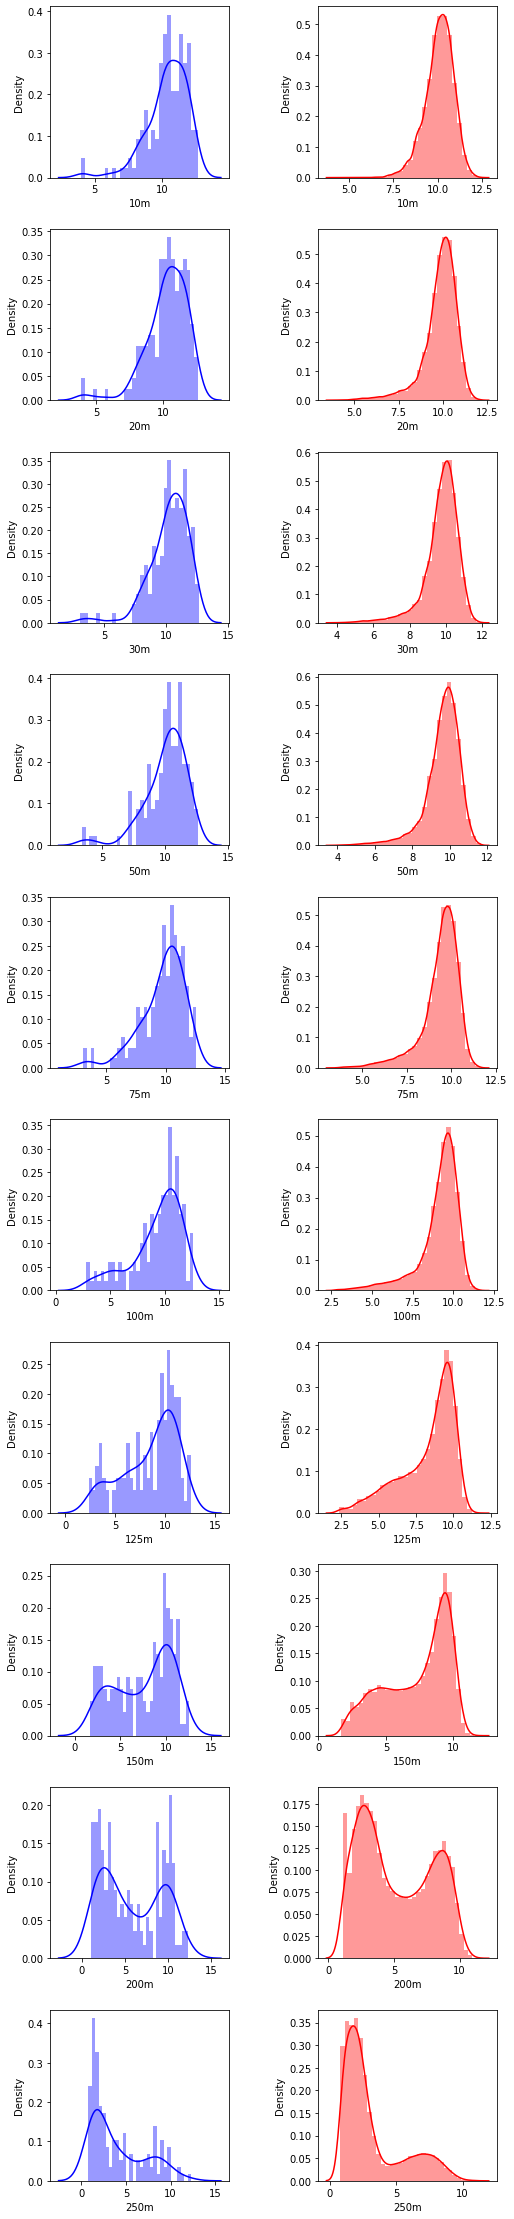

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

index=0
f,axes=plt.subplots(10,2, figsize=(8,40))
plt.subplots_adjust(hspace = 0.3,wspace=0.5)
for depth in ['10','20','30','50','75','100','125','150','200','250']:
    #reshape_ocean_df_1965_FEB[[depth]].hist(bins=50,grid=False, xlabelsize=12, ylabelsize=12)
    #plt.xlabel("Temperature (C)", fontsize=15)
    #plt.ylabel("Frequency",fontsize=15)
    #plt.title('Orignial Dataset Depth:'+depth+'m')
    ax=sns.distplot(reshape_ocean_df_1965_FEB[depth],bins=30,kde=True,ax=axes[index,0],axlabel=depth+'m',color='b')
    #plt.title('Model Dataset Depth:'+depth+'m')
    ax=sns.distplot(model_output_1965_FEB[depth],bins=30,kde=True, ax=axes[index, 1],color='r',axlabel=depth+'m')
    #sns.distplot(reshape_ocean_df_1965_FEB[depth],bins=30,kde=False,ax=axes[index,0])
    #sns.distplot(model_output_df_FEB[depth],bins=30,kde=False, ax=axes[index,1])
    #plt.show()
    index=index+1;
    #sns.distplot(reshape_ocean_df_1965_FEB[depth], kde=False, color='red', bins=30)
    #create seaborn barplot
    
    

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-l

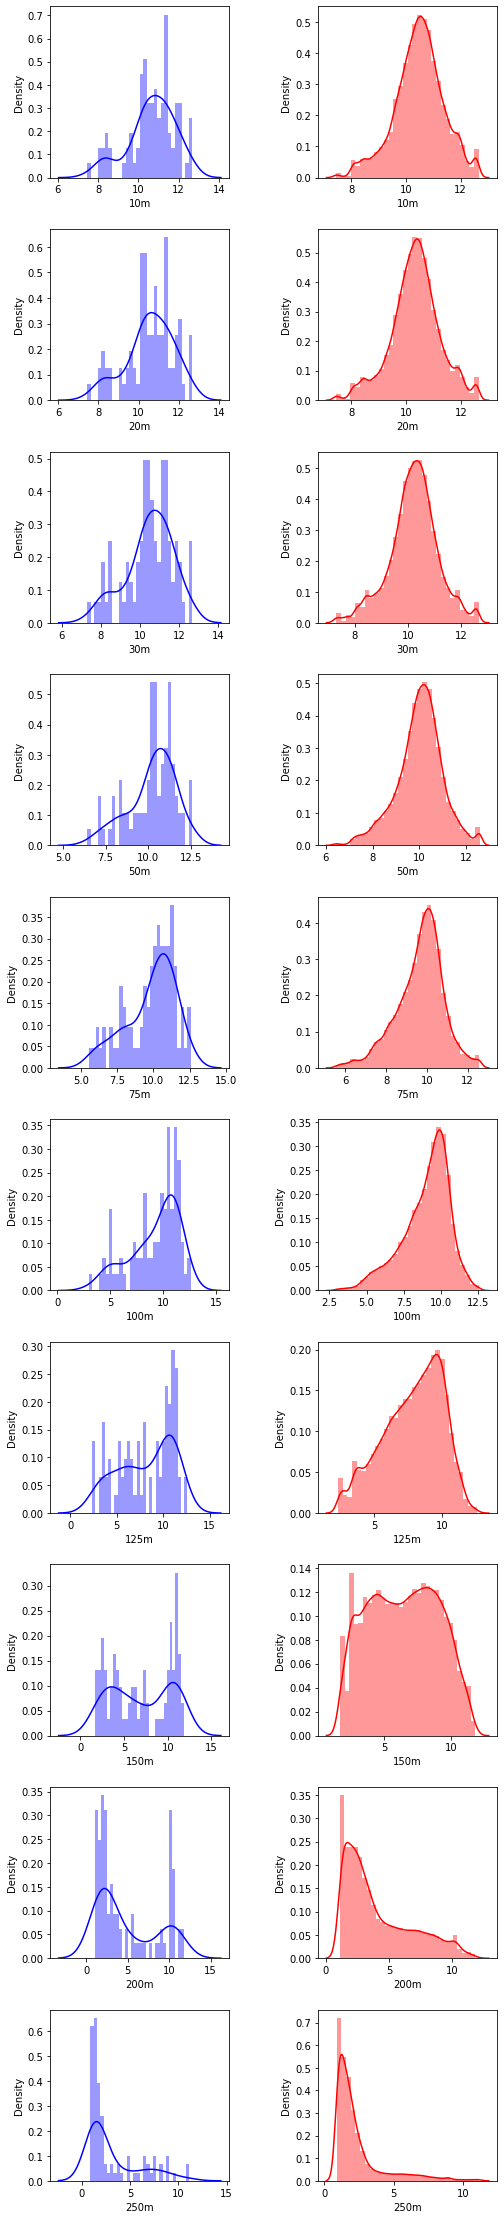

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

index=0
f,axes=plt.subplots(10,2, figsize=(8,40))
plt.subplots_adjust(hspace = 0.3,wspace=0.5)
for depth in ['10','20','30','50','75','100','125','150','200','250']:
    #reshape_ocean_df_1965_FEB[[depth]].hist(bins=50,grid=False, xlabelsize=12, ylabelsize=12)
    #plt.xlabel("Temperature (C)", fontsize=15)
    #plt.ylabel("Frequency",fontsize=15)
    #plt.title('Orignial Dataset Depth:'+depth+'m')
    ax=sns.distplot(reshape_ocean_df_FEB[depth],bins=30,kde=True,ax=axes[index,0],axlabel=depth+'m',color='blue')
    #plt.title('Model Dataset Depth:'+depth+'m')
    ax=sns.distplot(model_output_df_FEB[depth],bins=30,kde=True, ax=axes[index, 1],color='red',axlabel=depth+'m')
    #sns.distplot(reshape_ocean_df_1965_FEB[depth],bins=30,kde=False,ax=axes[index,0])
    #sns.distplot(model_output_df_FEB[depth],bins=30,kde=False, ax=axes[index,1])
    #plt.show()
    index=index+1;
    #sns.distplot(reshape_ocean_df_1965_FEB[depth], kde=False, color='red', bins=30)
    #create seaborn barplot
    

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-l

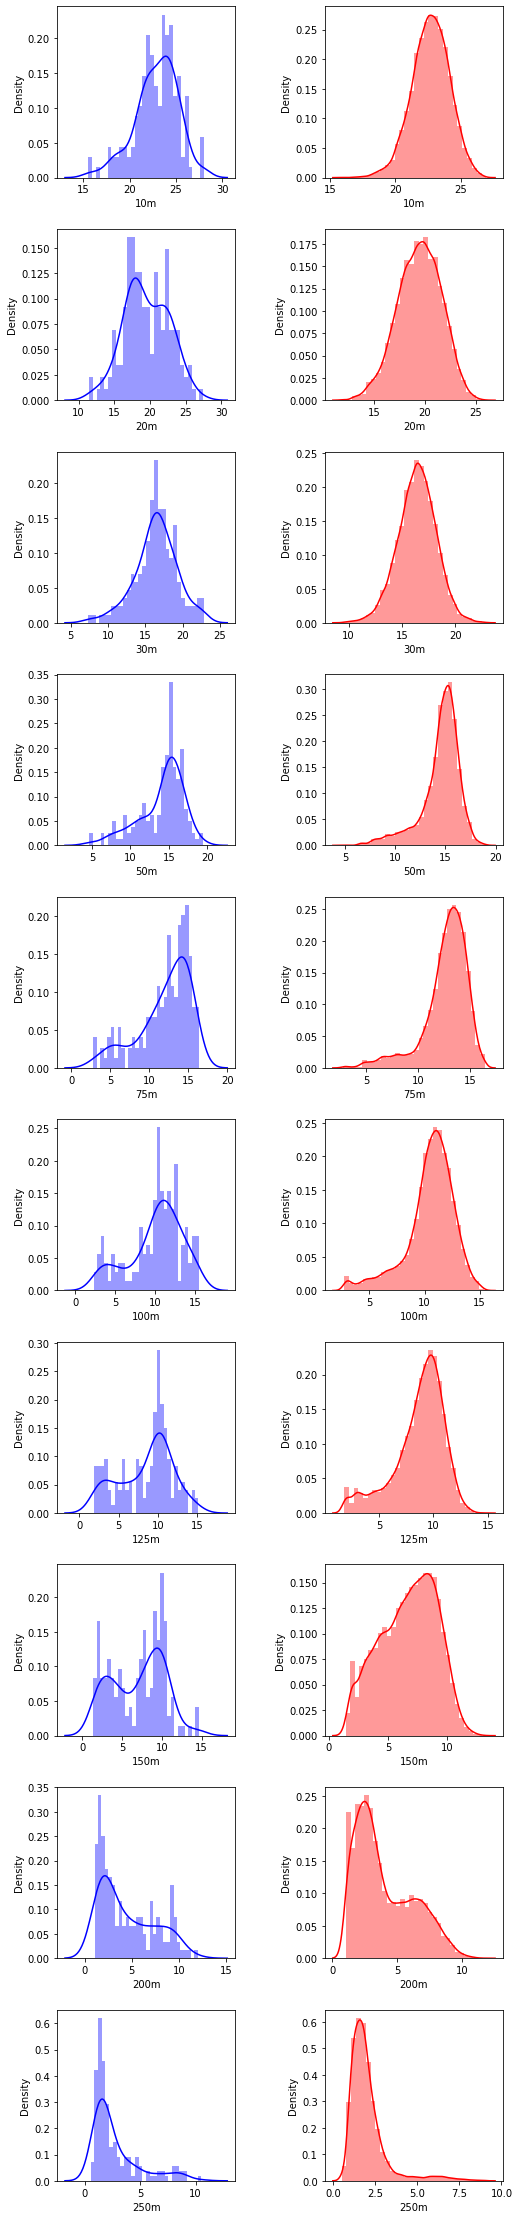

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

index=0
f,axes=plt.subplots(10,2, figsize=(8,40))
plt.subplots_adjust(hspace = 0.3,wspace=0.5)
for depth in ['10','20','30','50','75','100','125','150','200','250']:
    #reshape_ocean_df_1965_FEB[[depth]].hist(bins=50,grid=False, xlabelsize=12, ylabelsize=12)
    #plt.xlabel("Temperature (C)", fontsize=15)
    #plt.ylabel("Frequency",fontsize=15)
    #plt.title('Orignial Dataset Depth:'+depth+'m')
    ax=sns.distplot(reshape_ocean_df_1965_AUG[depth],bins=30,kde=True,ax=axes[index,0],axlabel=depth+'m',color='b')
    #plt.title('Model Dataset Depth:'+depth+'m')
    ax=sns.distplot(model_output_1965_AUG[depth],bins=30,kde=True, ax=axes[index, 1],color='r',axlabel=depth+'m')
    #sns.distplot(reshape_ocean_df_1965_FEB[depth],bins=30,kde=False,ax=axes[index,0])
    #sns.distplot(model_output_df_FEB[depth],bins=30,kde=False, ax=axes[index,1])
    #plt.show()
    index=index+1;
    #sns.distplot(reshape_ocean_df_1965_FEB[depth], kde=False, color='red', bins=30)
    #create seaborn barplot
    
    

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-l

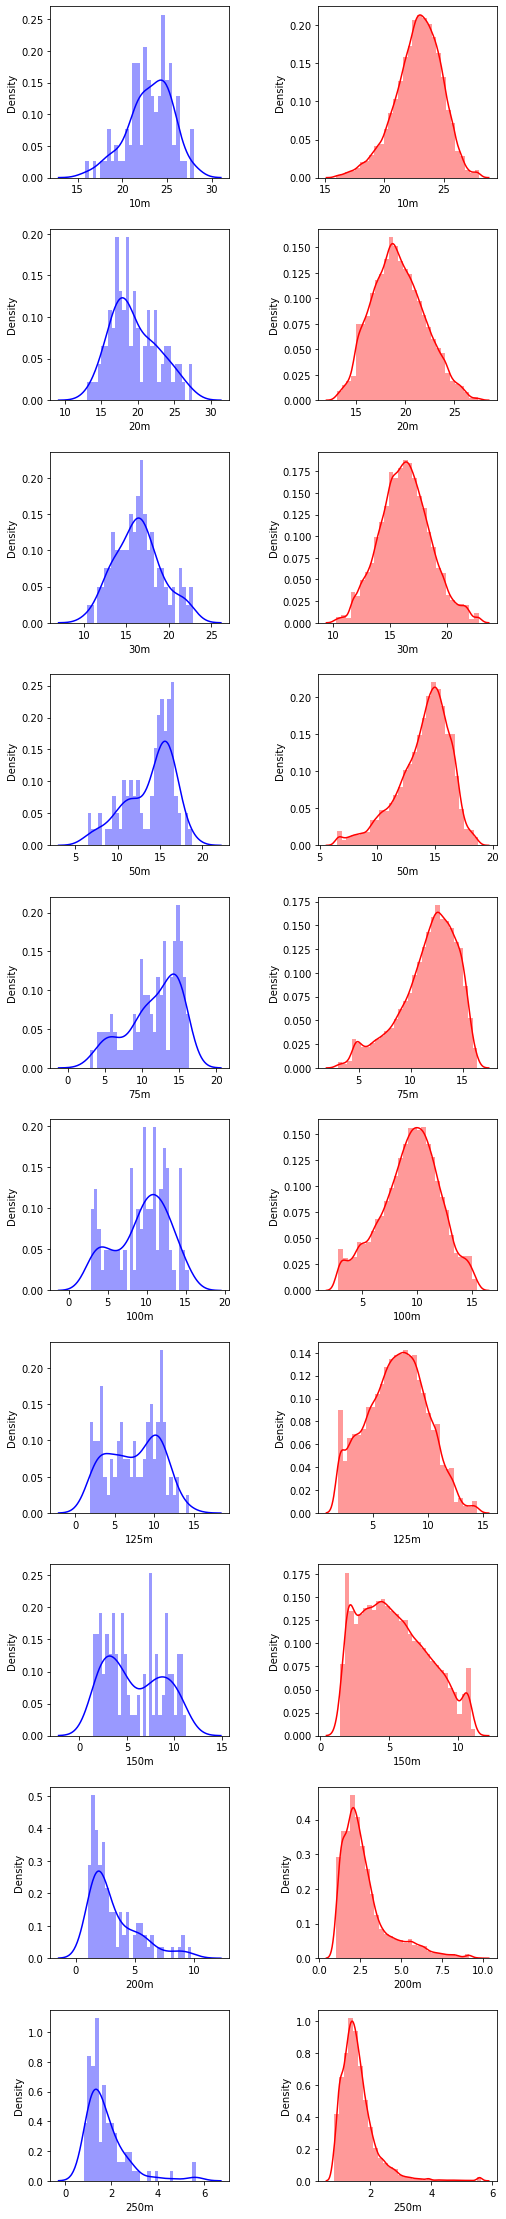

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

index=0
f,axes=plt.subplots(10,2, figsize=(8,40))
plt.subplots_adjust(hspace = 0.3,wspace=0.5)
for depth in ['10','20','30','50','75','100','125','150','200','250']:
    #reshape_ocean_df_1965_FEB[[depth]].hist(bins=50,grid=False, xlabelsize=12, ylabelsize=12)
    #plt.xlabel("Temperature (C)", fontsize=15)
    #plt.ylabel("Frequency",fontsize=15)
    #plt.title('Orignial Dataset Depth:'+depth+'m')
    ax=sns.distplot(reshape_ocean_df_AUG[depth],bins=30,kde=True,ax=axes[index,0],axlabel=depth+'m',color='b')
    #plt.title('Model Dataset Depth:'+depth+'m')
    ax=sns.distplot(model_output_df_AUG[depth],bins=30,kde=True, ax=axes[index, 1],color='r',axlabel=depth+'m')
    #sns.distplot(reshape_ocean_df_1965_FEB[depth],bins=30,kde=False,ax=axes[index,0])
    #sns.distplot(model_output_df_FEB[depth],bins=30,kde=False, ax=axes[index,1])
    #plt.show()
    index=index+1;
    #sns.distplot(reshape_ocean_df_1965_FEB[depth], kde=False, color='red', bins=30)
    #create seaborn barplot
    

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


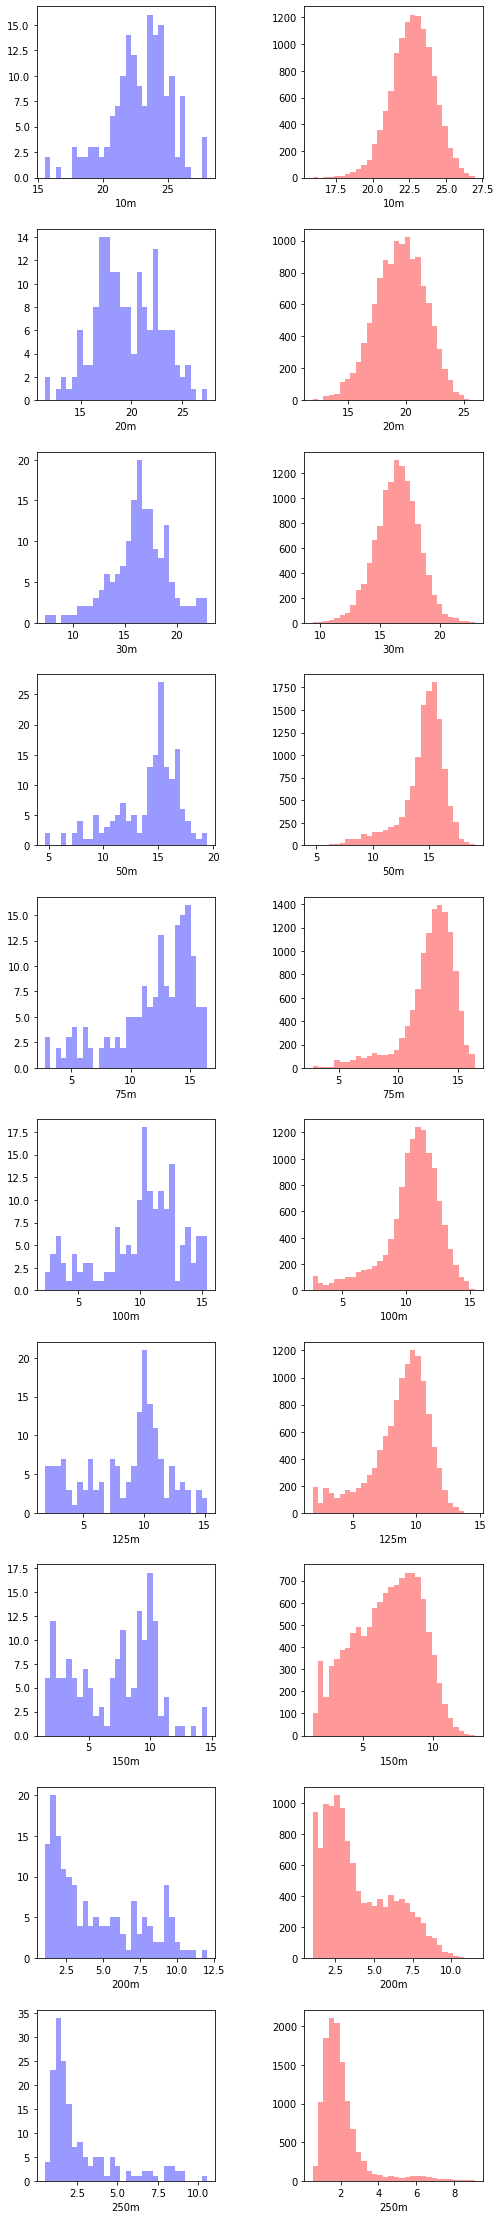

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

index=0
f,axes=plt.subplots(10,2, figsize=(8,40))
plt.subplots_adjust(hspace = 0.3,wspace=0.5)
for depth in ['10','20','30','50','75','100','125','150','200','250']:
    #reshape_ocean_df_1965_FEB[[depth]].hist(bins=50,grid=False, xlabelsize=12, ylabelsize=12)
    #plt.xlabel("Temperature (C)", fontsize=15)
    #plt.ylabel("Frequency",fontsize=15)
    #plt.title('Orignial Dataset Depth:'+depth+'m')
    ax=sns.distplot(reshape_ocean_df_1965_AUG[depth],bins=30,kde=False,ax=axes[index,0],axlabel=depth+'m',color='b')
    #plt.title('Model Dataset Depth:'+depth+'m')
    ax=sns.distplot(model_output_1965_AUG[depth],bins=30,kde=False, ax=axes[index, 1],color='r',axlabel=depth+'m')
    #sns.distplot(reshape_ocean_df_1965_FEB[depth],bins=30,kde=False,ax=axes[index,0])
    #sns.distplot(model_output_df_FEB[depth],bins=30,kde=False, ax=axes[index,1])
    #plt.show()
    index=index+1;
    #sns.distplot(reshape_ocean_df_1965_FEB[depth], kde=False, color='red', bins=30)
    #create seaborn barplot
    

In [44]:
reshape_ocean_df_1965_FEB=reshape_ocean_df_1965_FEB[(reshape_ocean_df_1965_FEB["Station-Point"]=='104-08')|(reshape_ocean_df_1965_FEB["Station-Point"]=='104-09')|(reshape_ocean_df_1965_FEB["Station-Point"]=='104-10')|(reshape_ocean_df_1965_FEB["Station-Point"]=='105-08')|(reshape_ocean_df_1965_FEB["Station-Point"]=='105-09')|(reshape_ocean_df_1965_FEB["Station-Point"]=='105-10')]

In [45]:
#reshape_ocean_df_1965_FEB

In [46]:
#reshape_ocean_df_1965_FEB

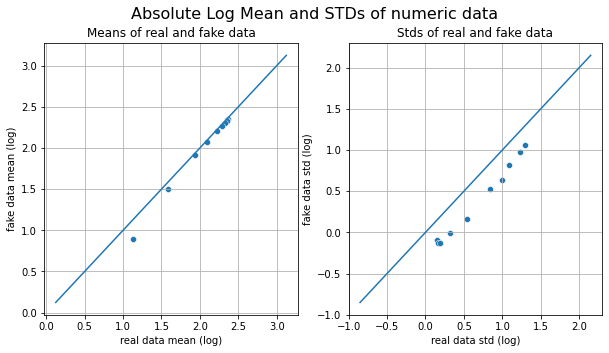

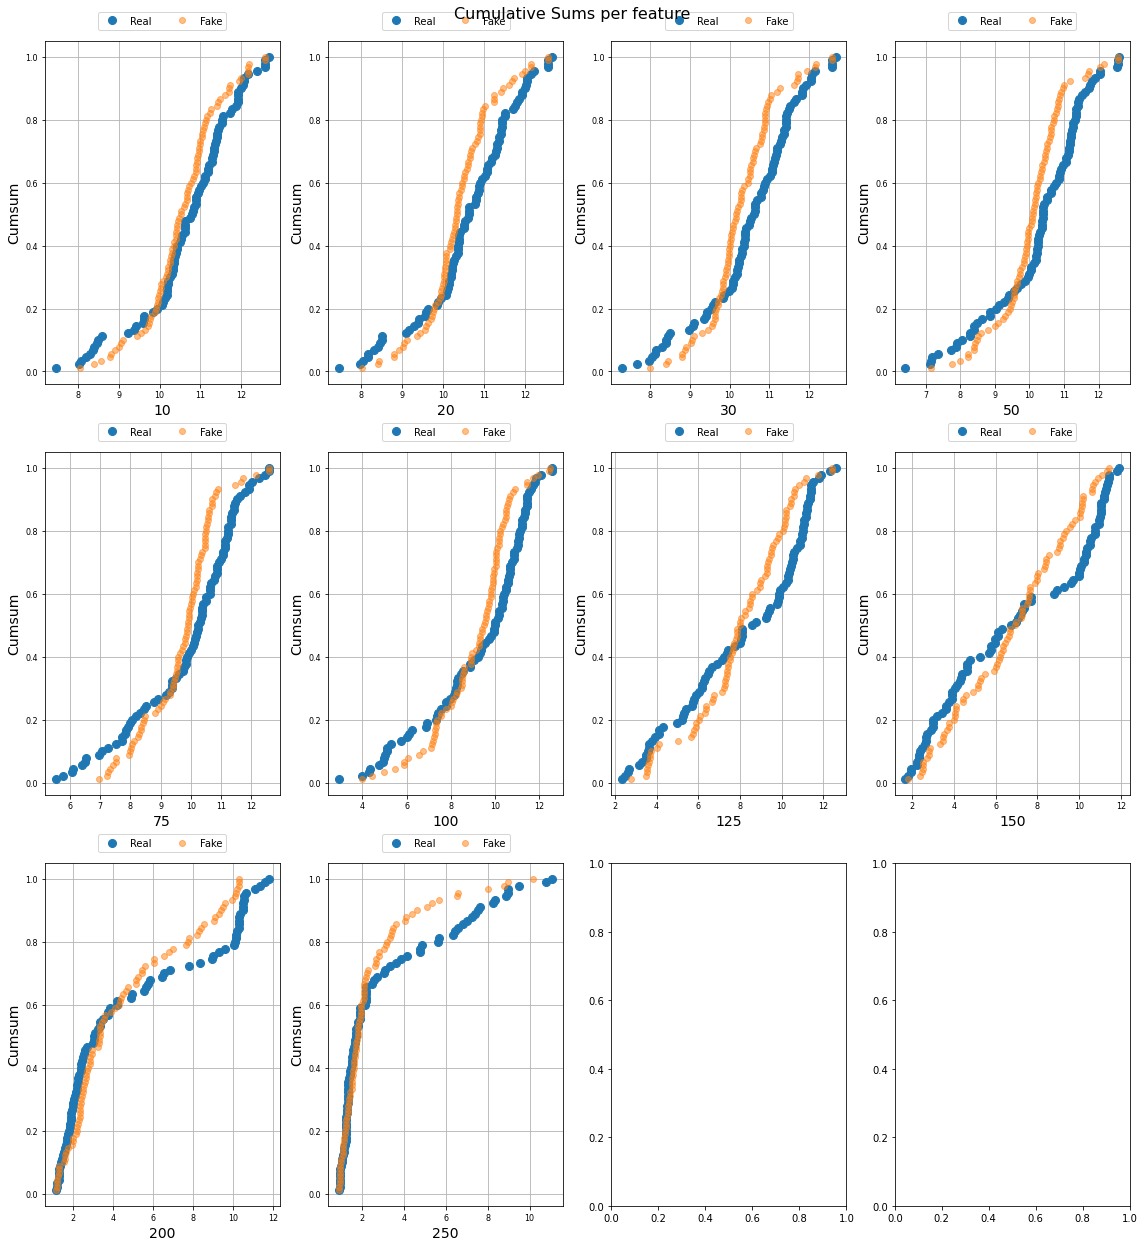

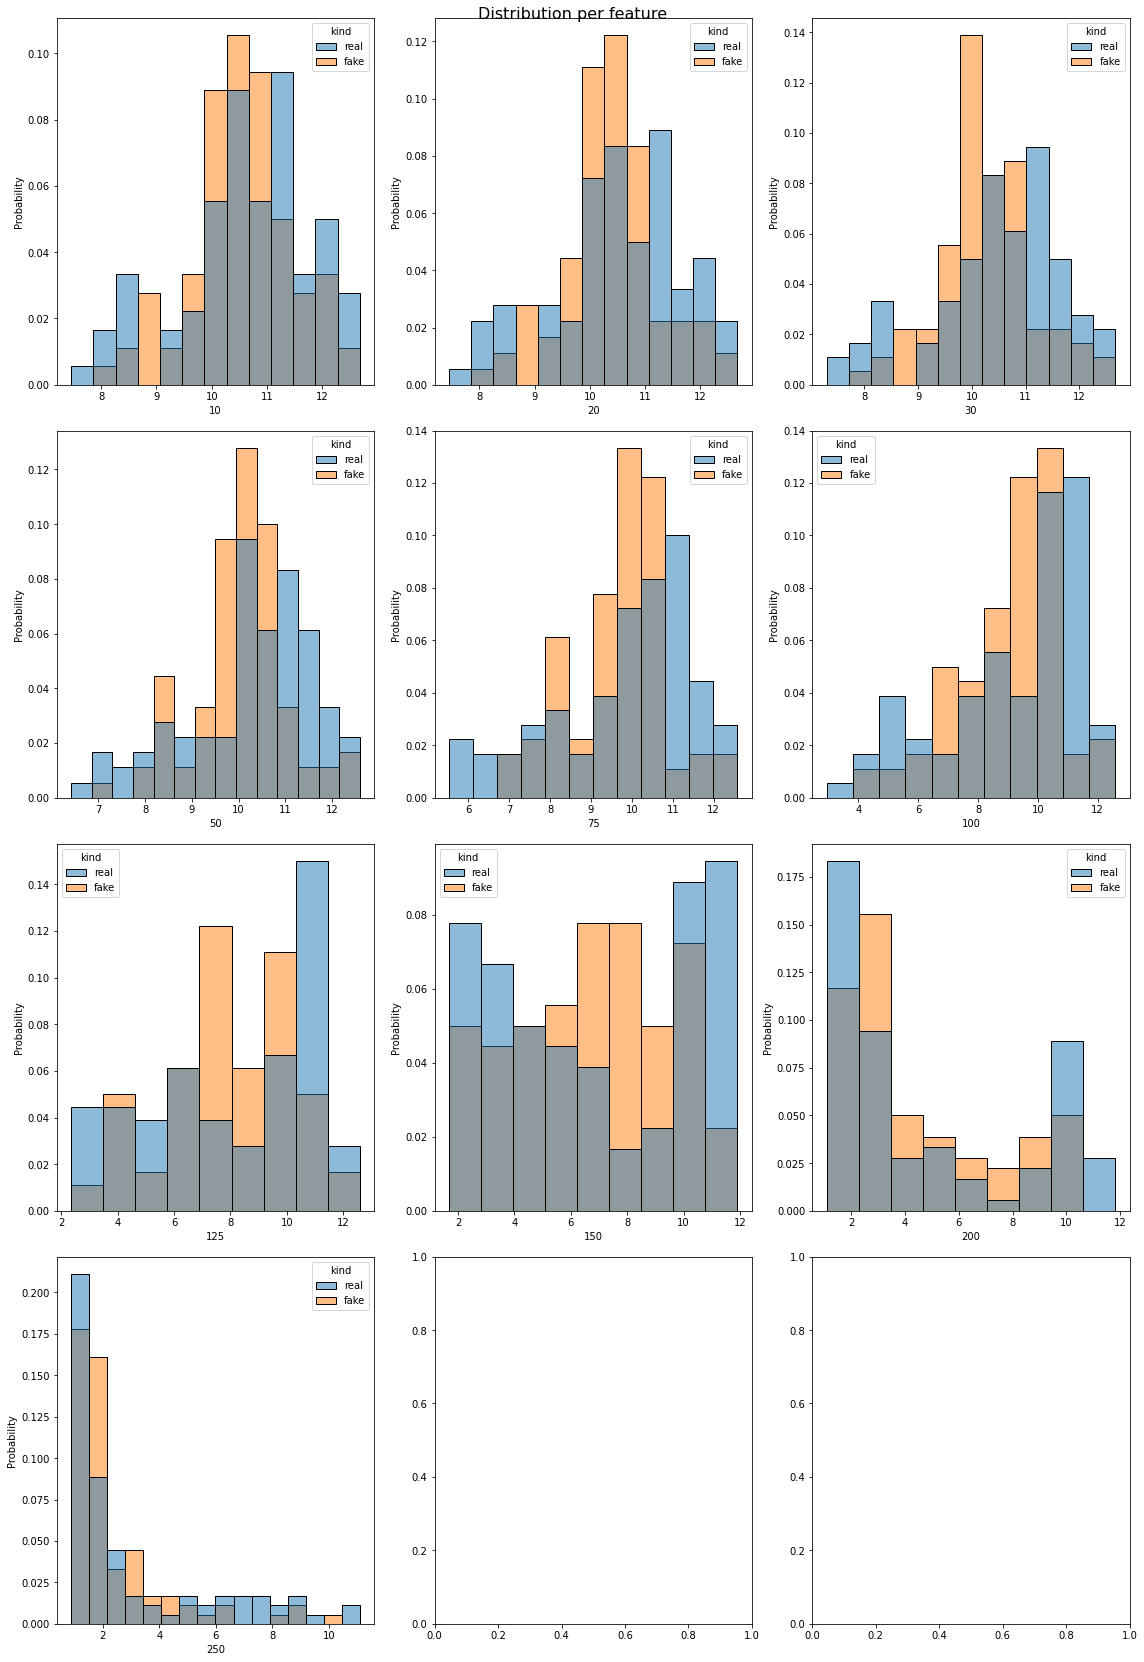

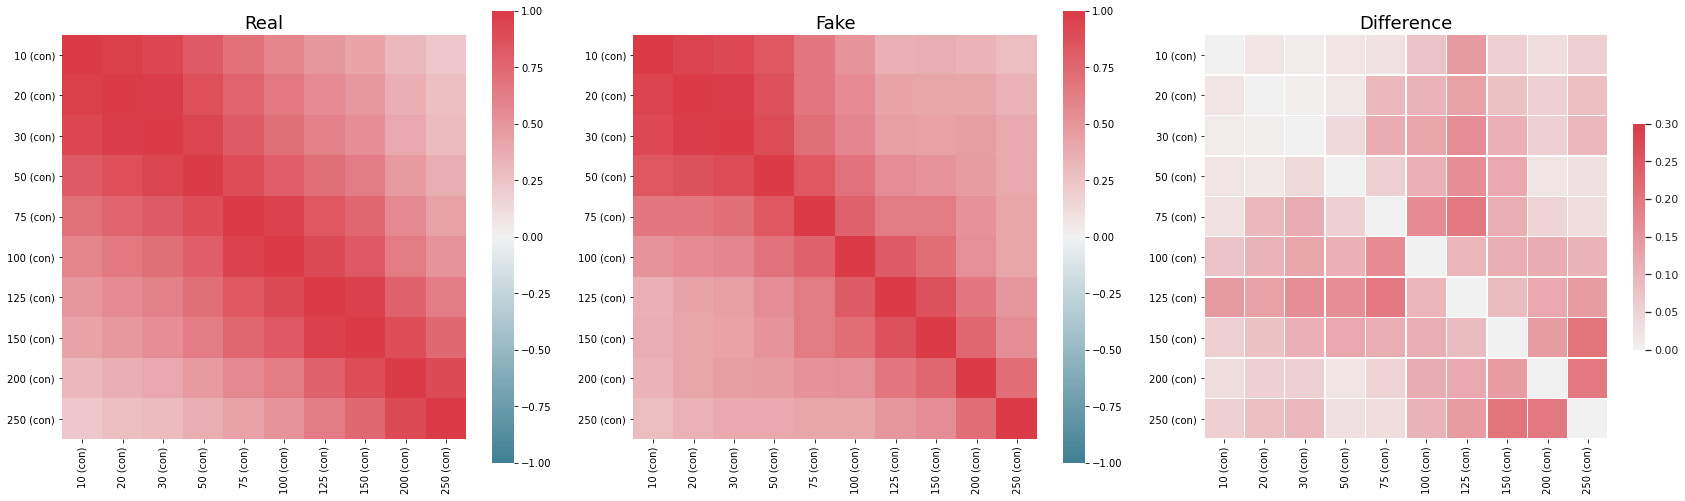

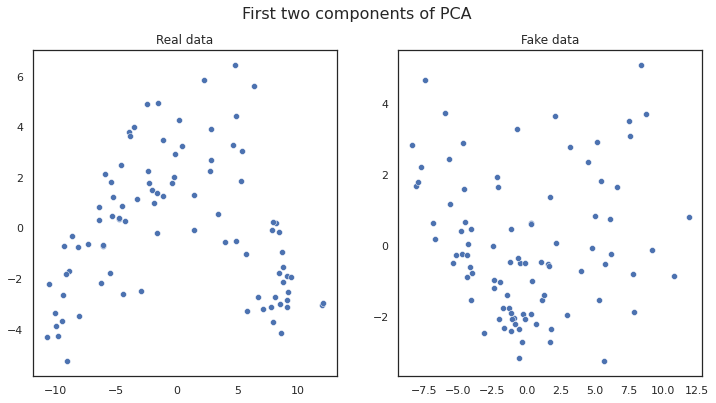

In [47]:
from table_evaluator import load_data, TableEvaluator
#real_data=data_deep
real_data=reshape_ocean_df_FEB[['10','20','30','50','75','100','125','150','200','250']]
synthetic_data=model_output_df_FEB[['10','20','30','50','75','100','125','150','200','250']]
table_evaluator = TableEvaluator(real_data, synthetic_data)
table_evaluator.visual_evaluation()

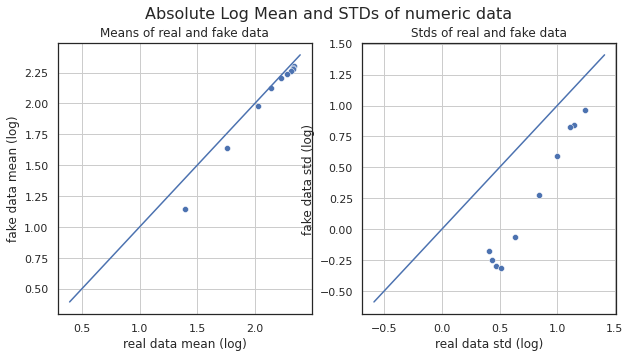

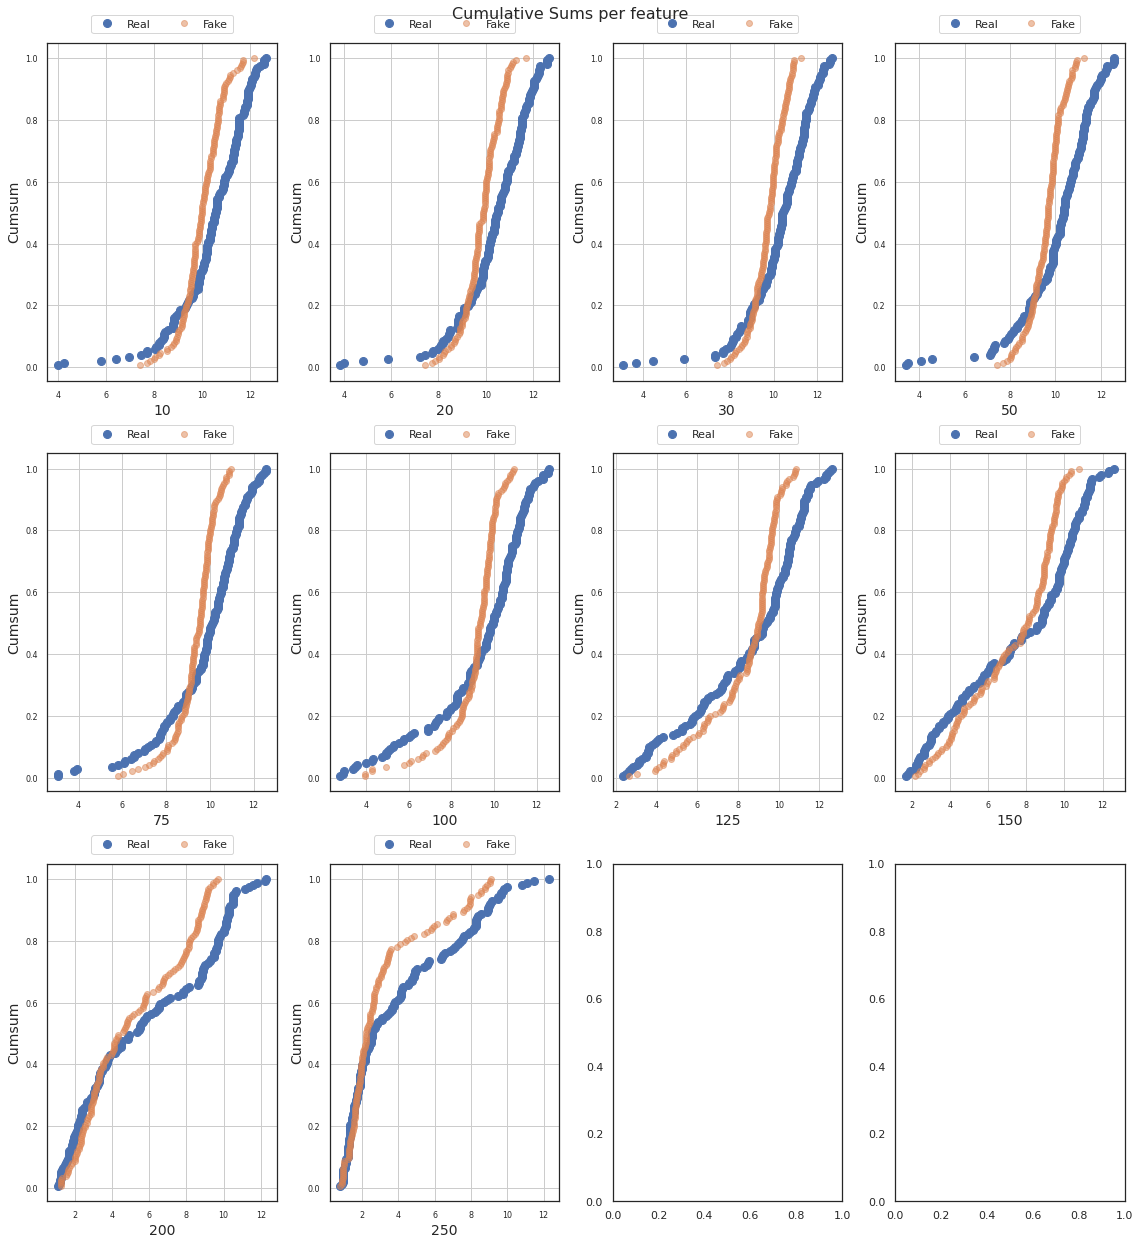

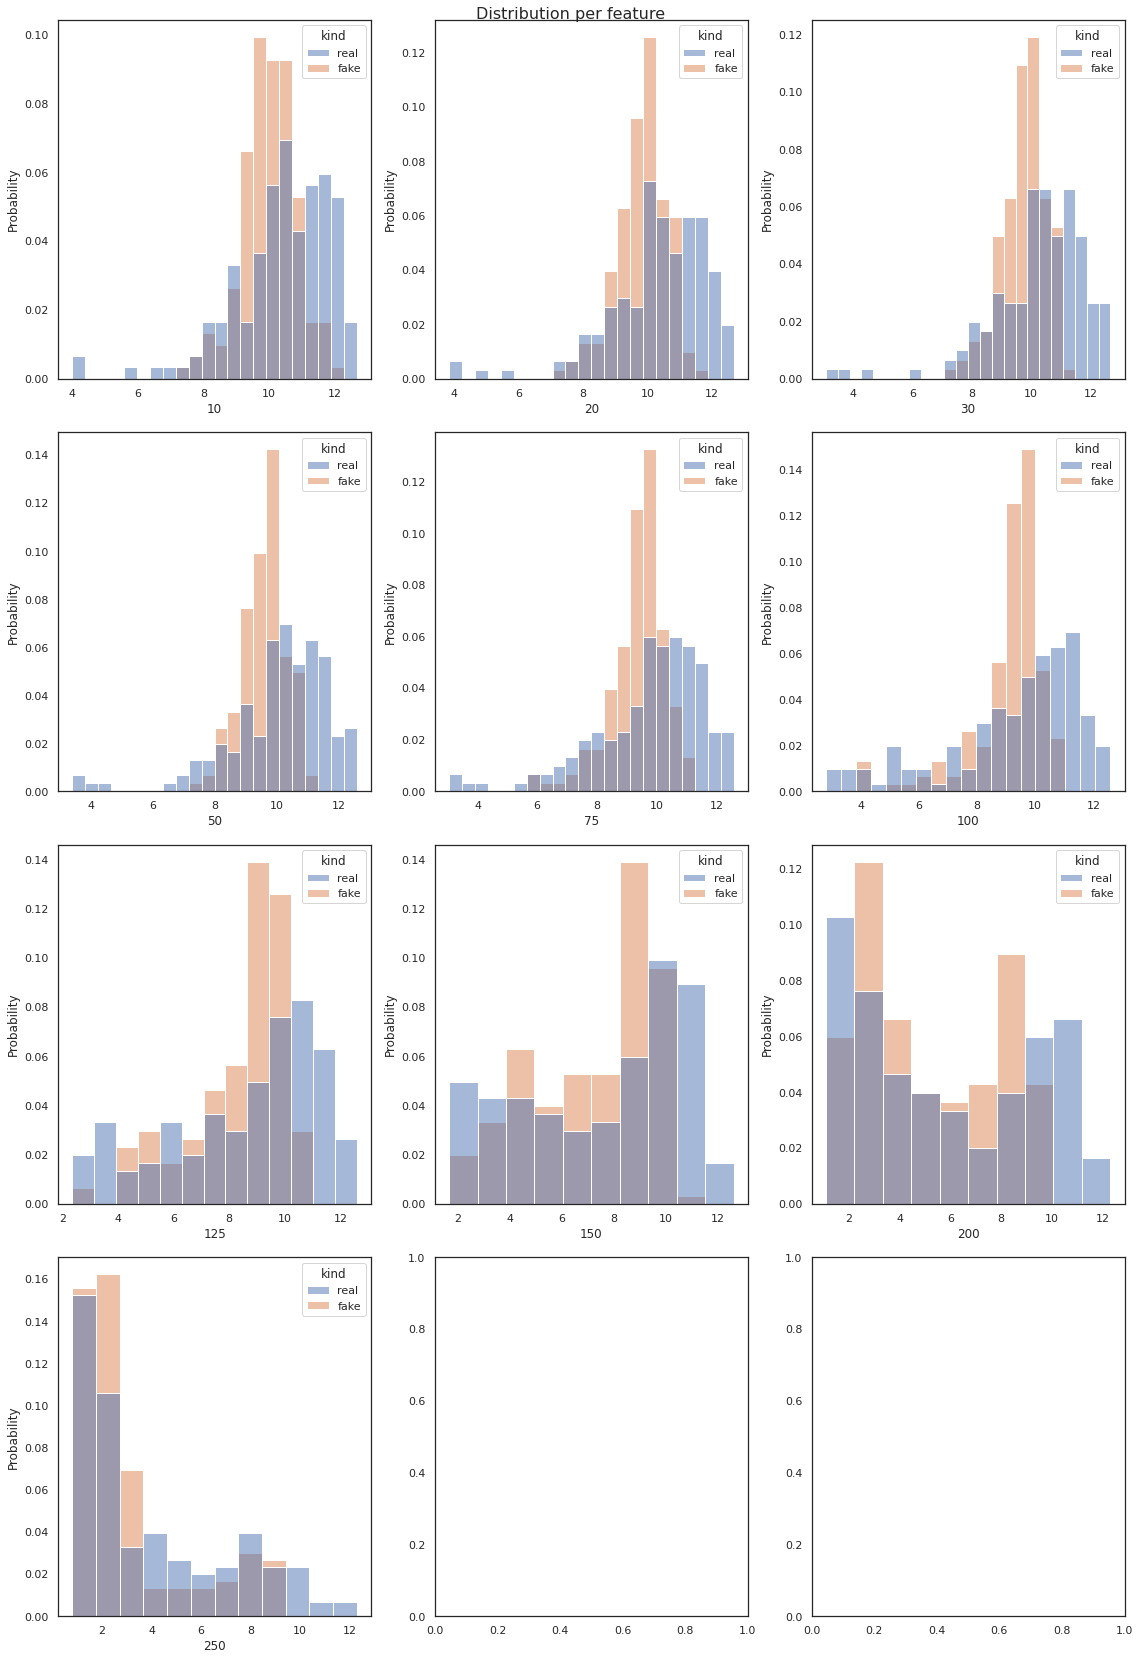

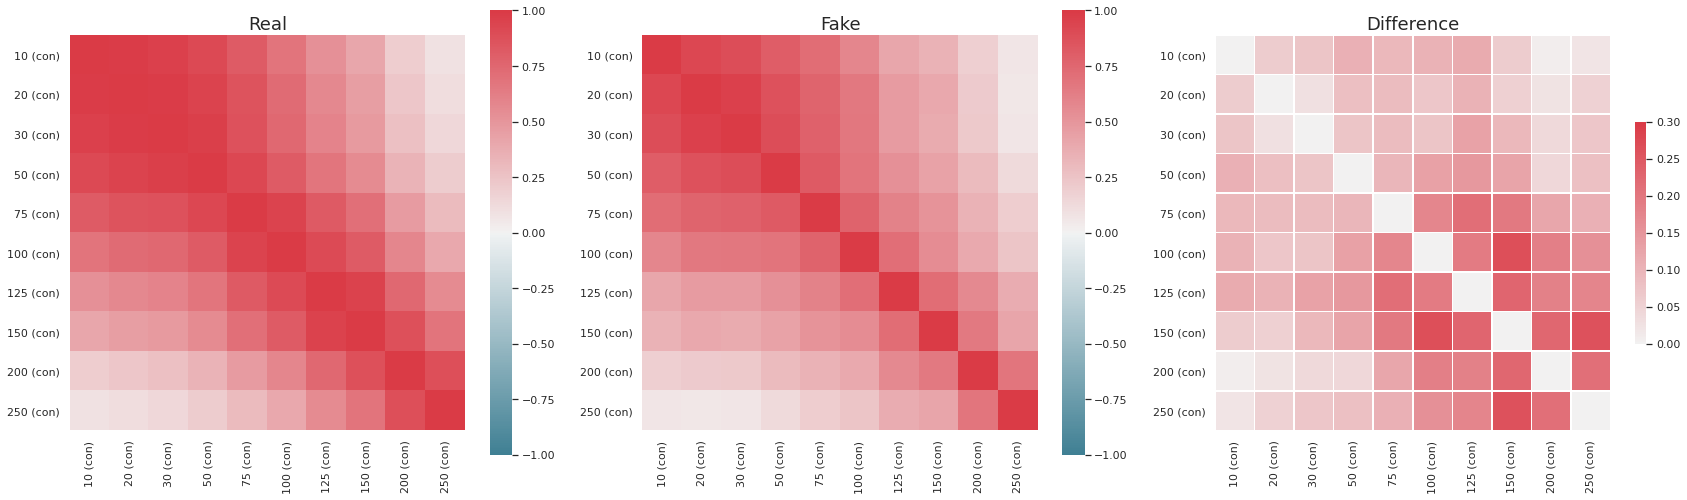

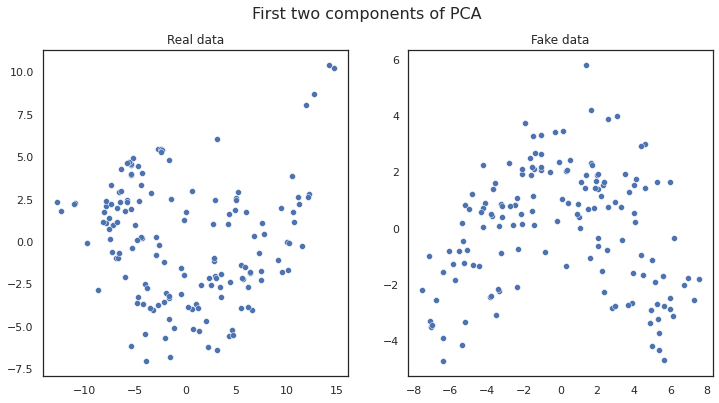

In [48]:
from table_evaluator import load_data, TableEvaluator
#real_data=data_deep
real_data=reshape_ocean_df_1965_FEB[['10','20','30','50','75','100','125','150','200','250']]
synthetic_data=model_output_1965_FEB[['10','20','30','50','75','100','125','150','200','250']]
table_evaluator = TableEvaluator(real_data, synthetic_data)
table_evaluator.visual_evaluation()

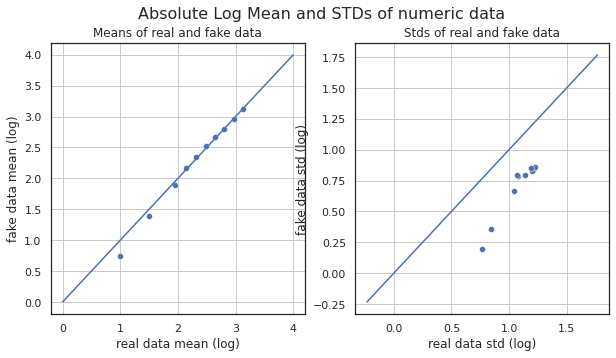

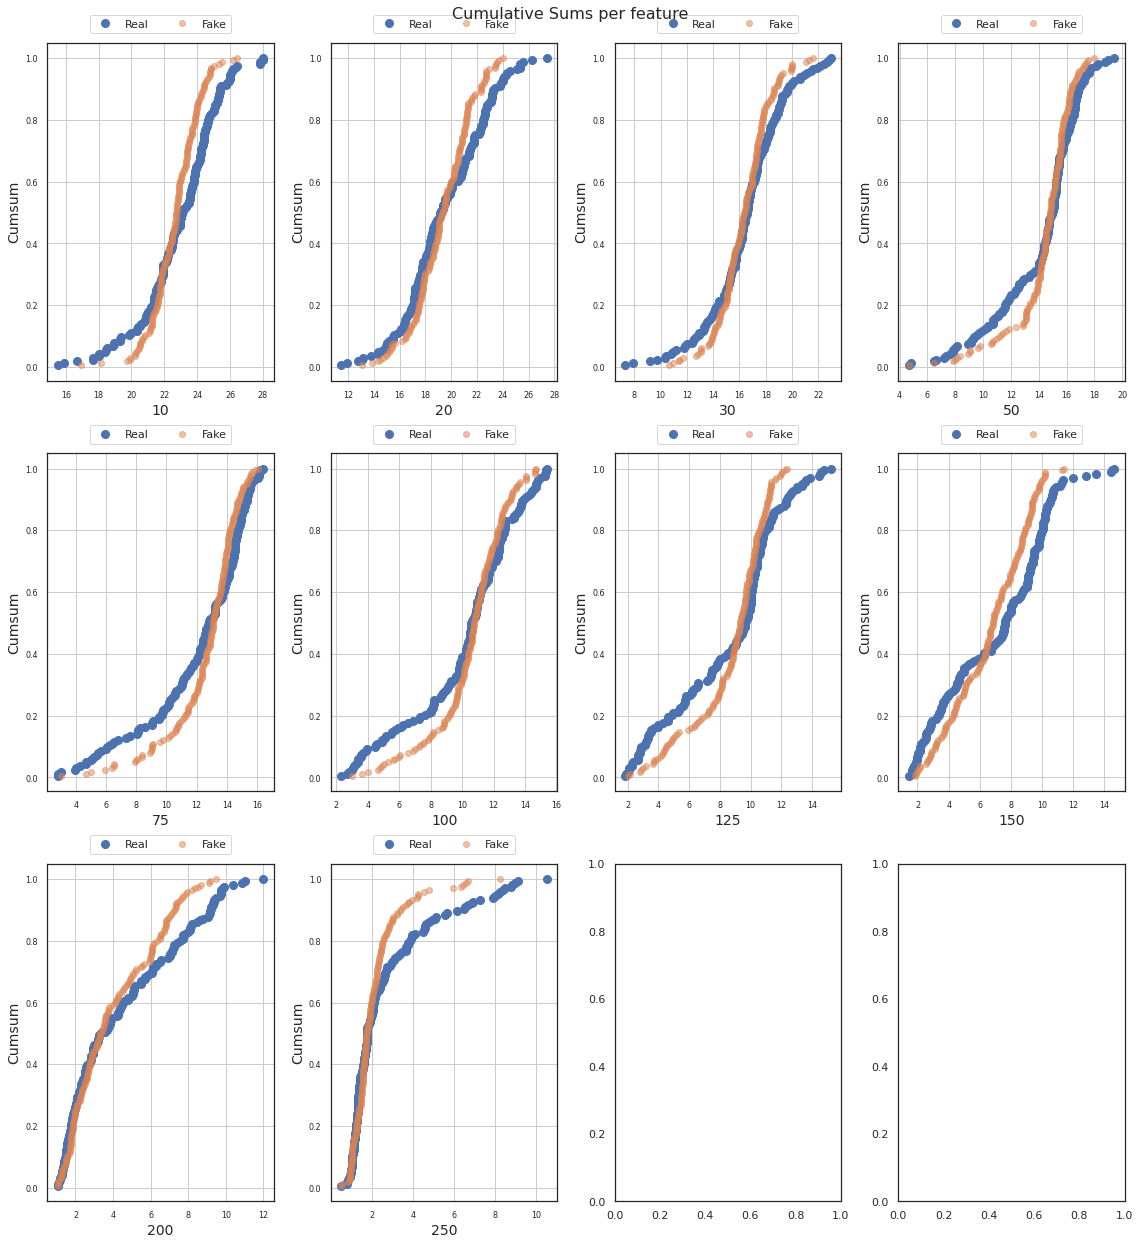

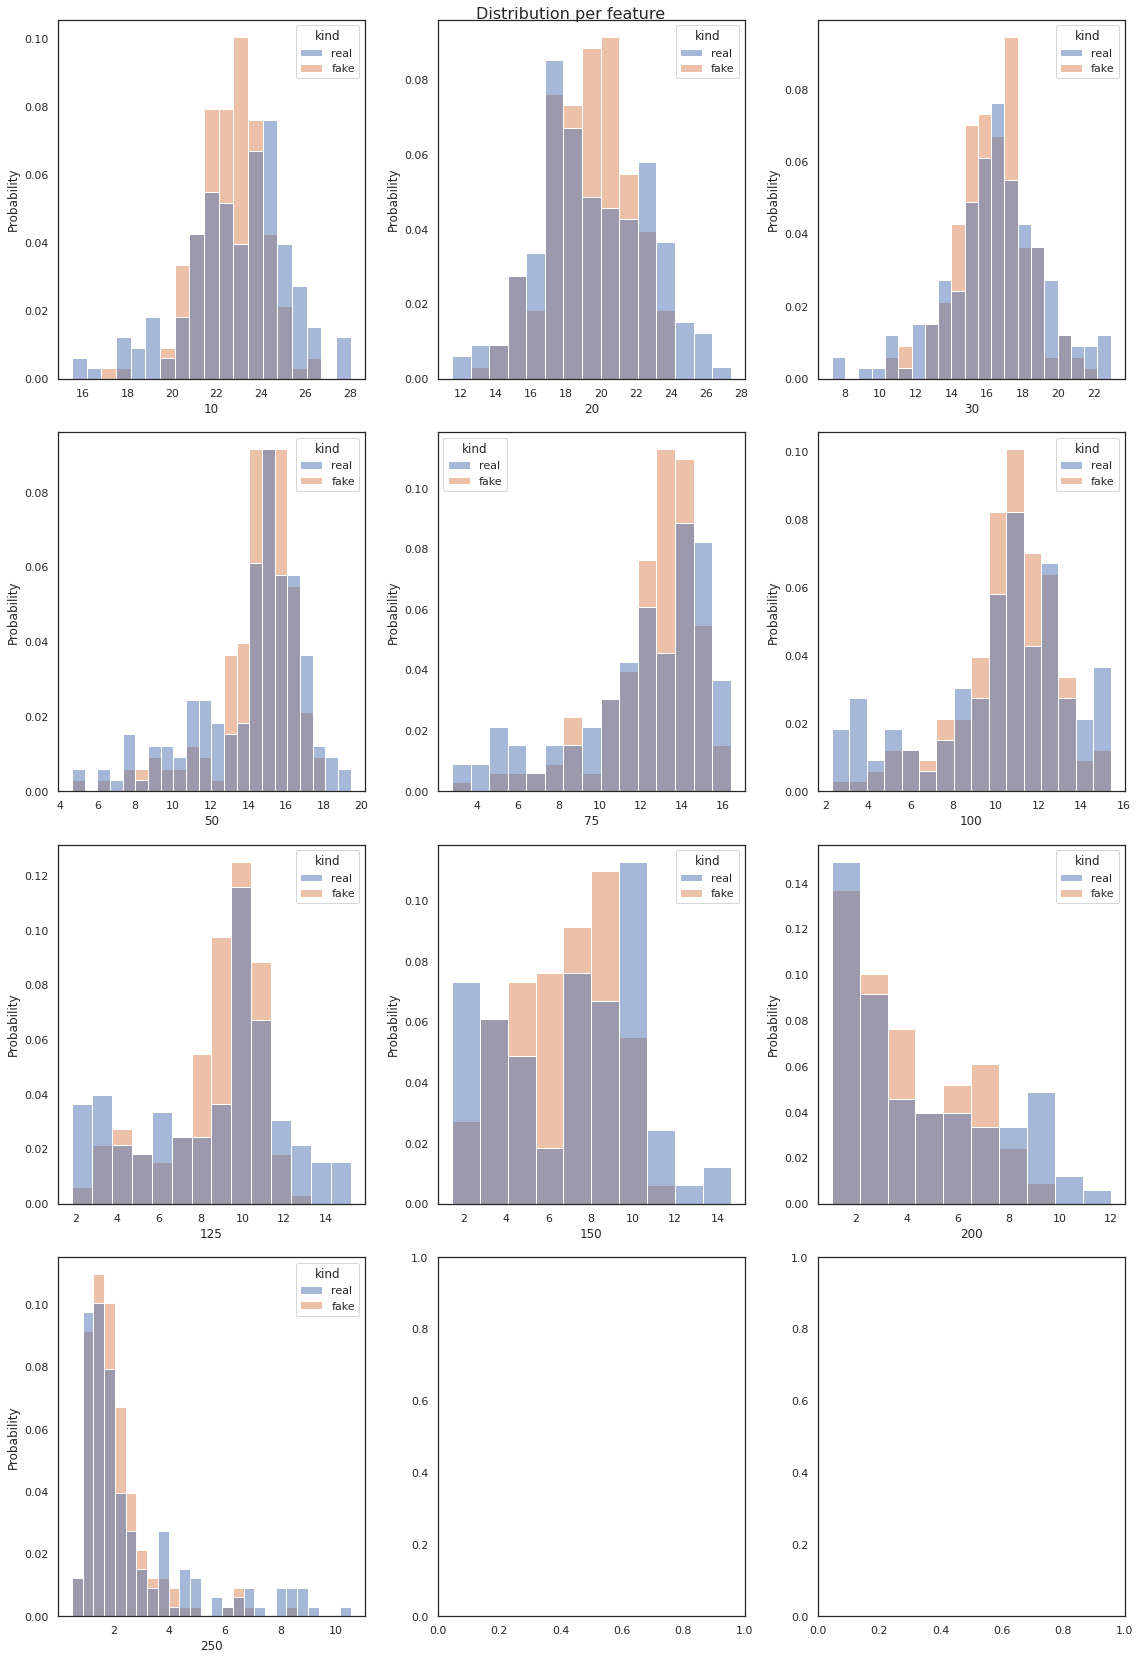

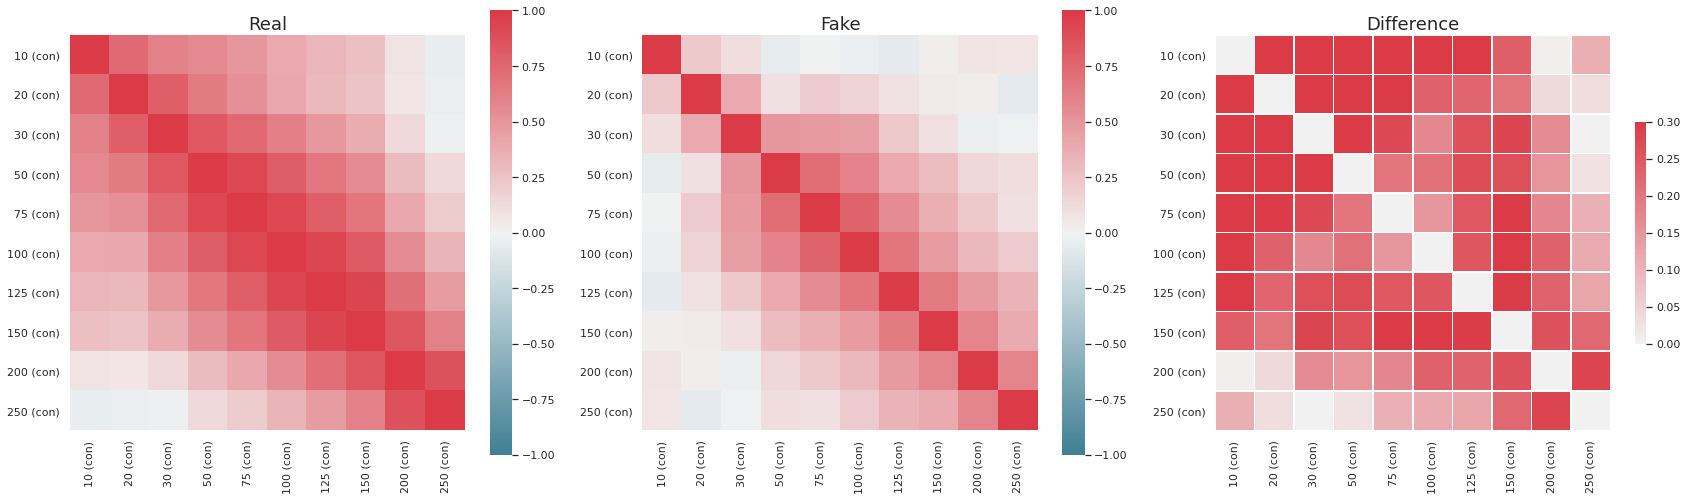

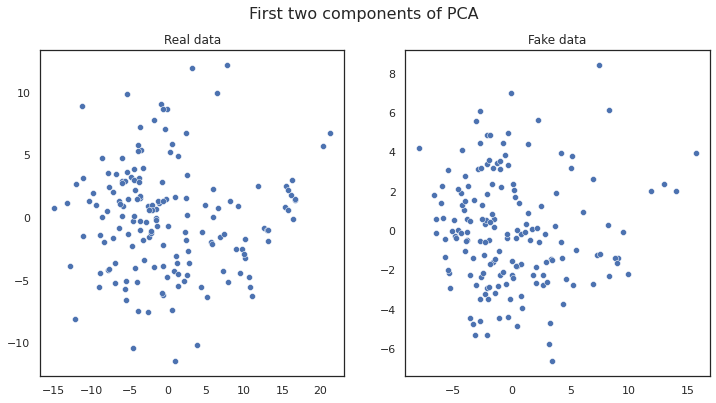

In [49]:
from table_evaluator import load_data, TableEvaluator
#real_data=data_deep
real_data=reshape_ocean_df_1965_AUG[['10','20','30','50','75','100','125','150','200','250']]
synthetic_data=model_output_1965_AUG[['10','20','30','50','75','100','125','150','200','250']]
table_evaluator = TableEvaluator(real_data, synthetic_data)
table_evaluator.visual_evaluation()

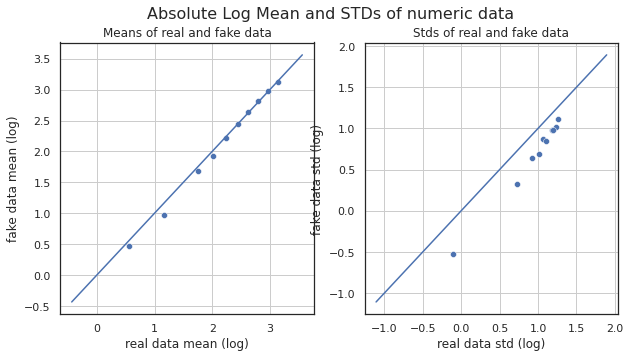

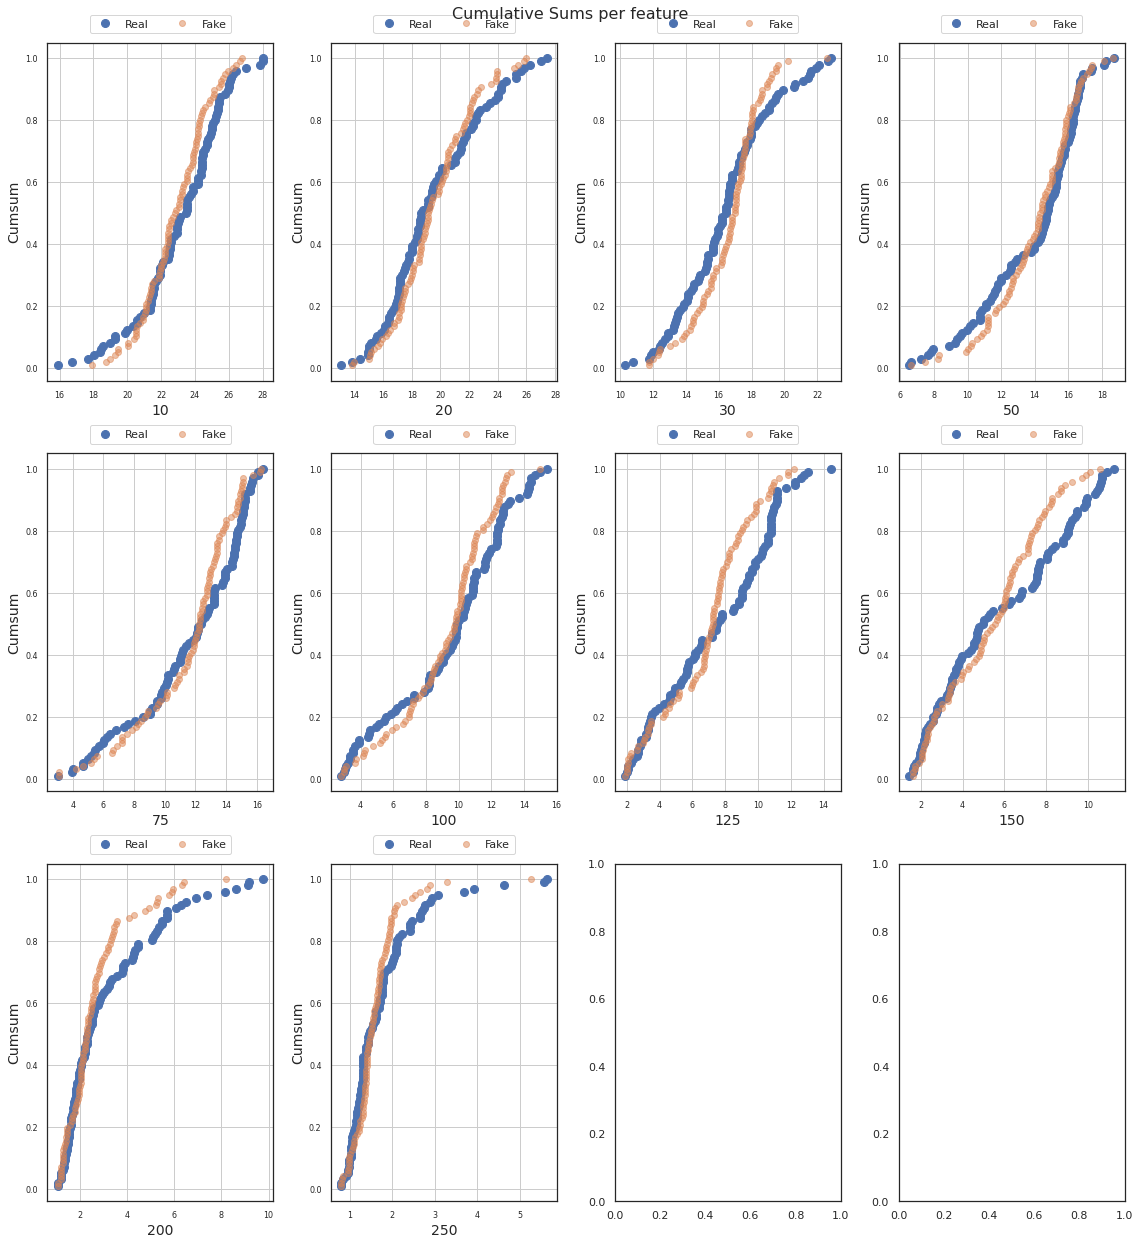

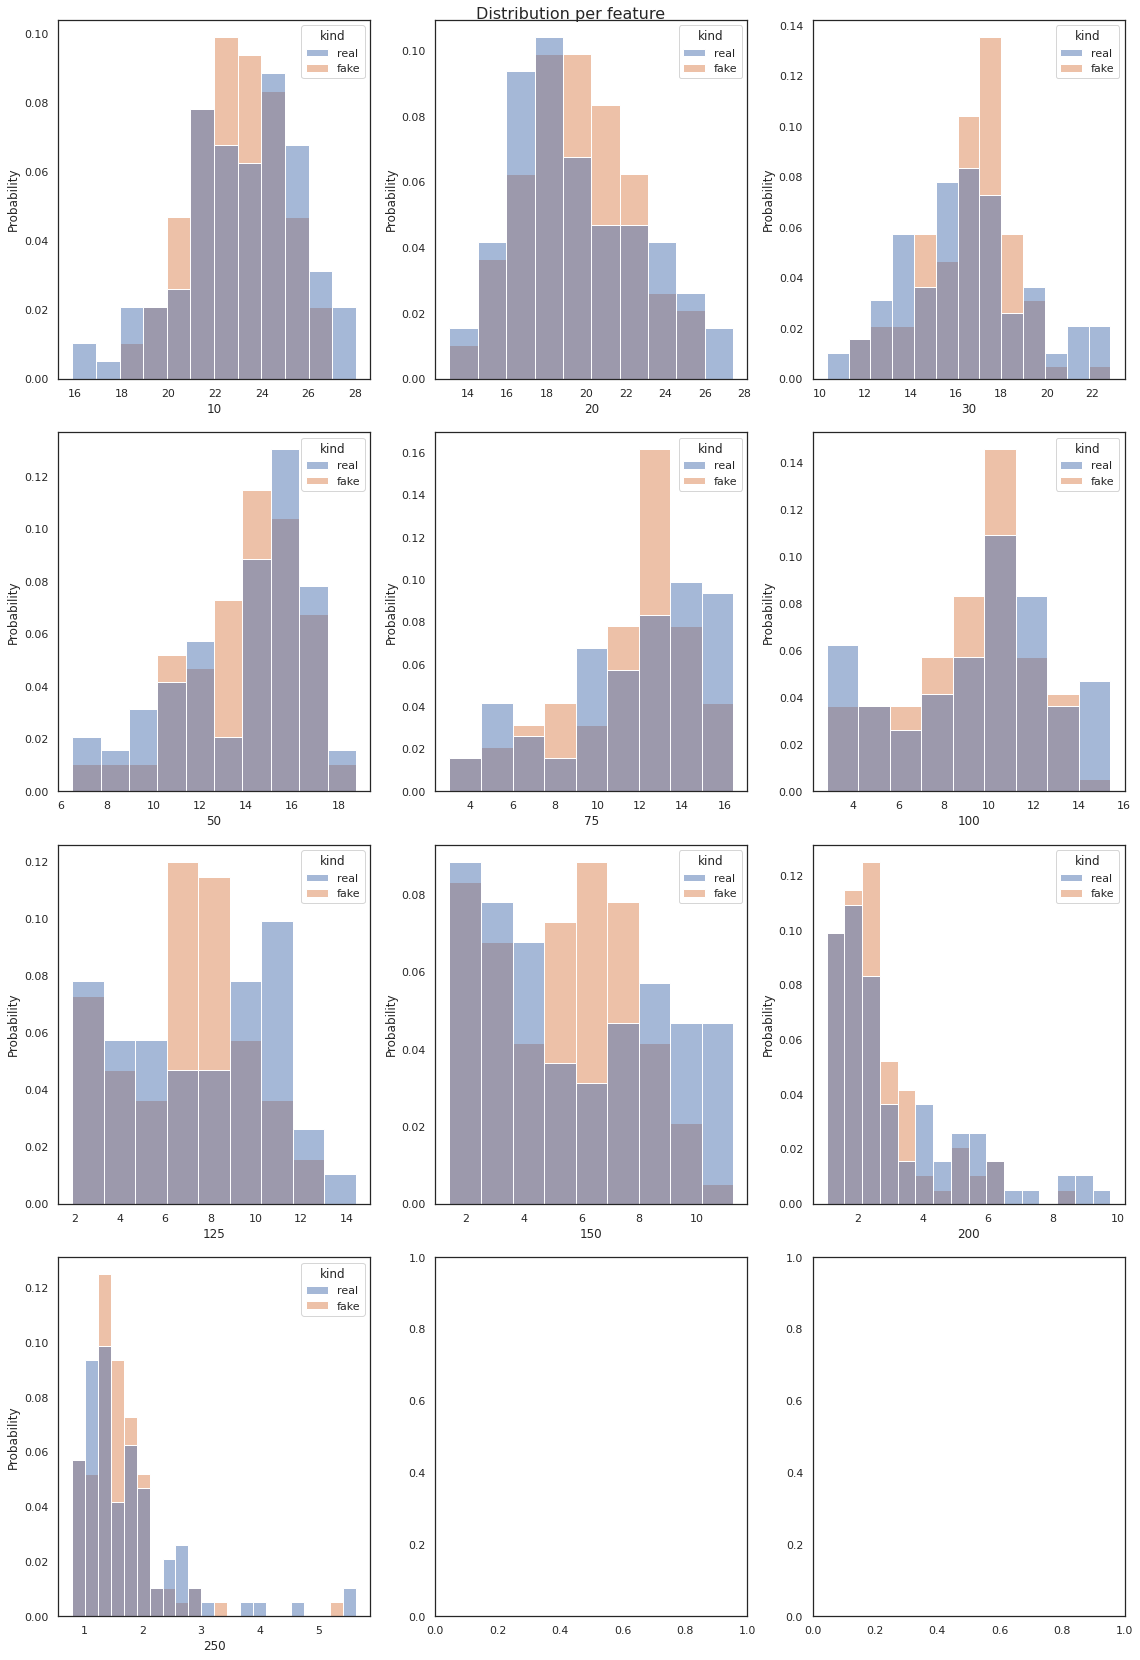

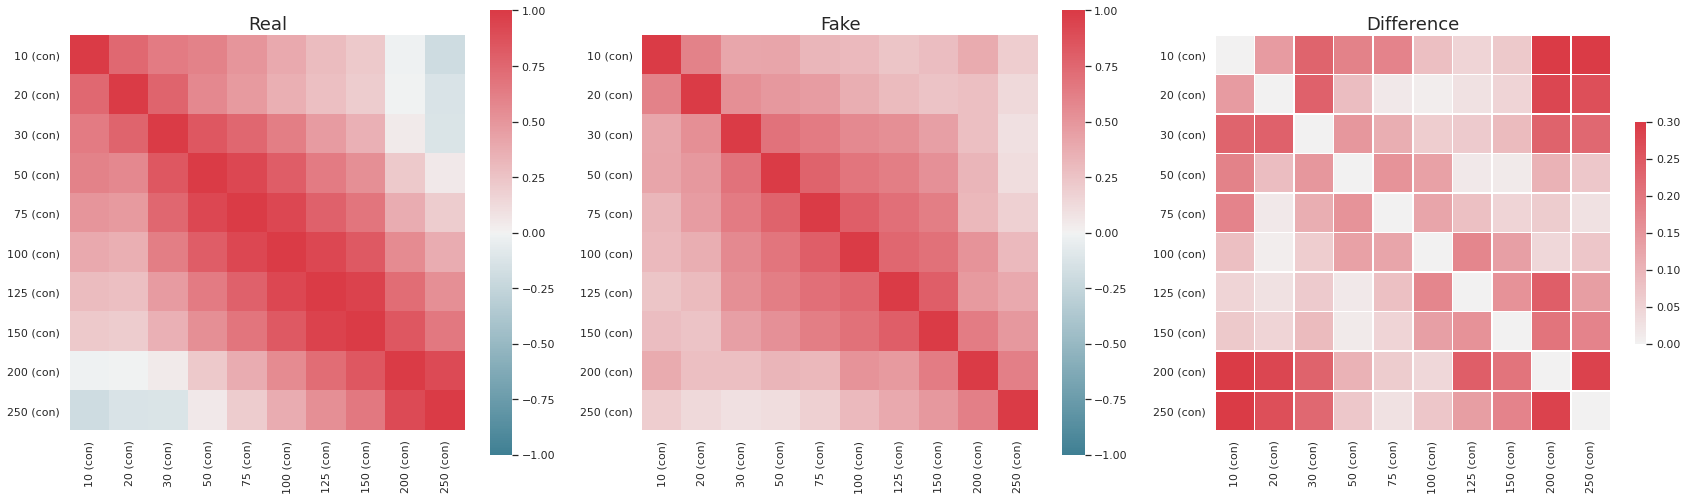

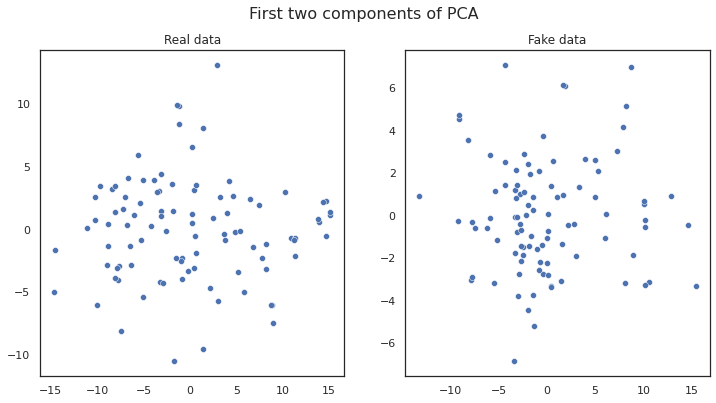

In [50]:
from table_evaluator import load_data, TableEvaluator
#real_data=data_deep
real_data=reshape_ocean_df_AUG[['10','20','30','50','75','100','125','150','200','250']]
synthetic_data=model_output_df_AUG[['10','20','30','50','75','100','125','150','200','250']]
table_evaluator = TableEvaluator(real_data, synthetic_data)
table_evaluator.visual_evaluation()

In [73]:
from sdv.evaluation import evaluate
evaluate(synthetic_data, real_data)
evaluate(synthetic_data, real_data, aggregate=False)

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sdmetrics/single_table/multi_single_column.py:84: RuntimeWarning: Mean of empty slice
  return np.nanmean(scores)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sdmetrics/column_pairs/statistical/kl_divergence.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_data[pd.isnull(real_data)] = 0.0
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/pandas/core/frame.py:3089: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(-key, value, inplace=True)
/home/gi

,metric,name,raw_score,normalized_score,min_value,max_value,goal
1,LogisticDetection,LogisticRegression Detection,0.542358,5.423583e-01,0.0,1.0,MAXIMIZE
2,SVCDetection,SVC Detection,0.346682,3.466821e-01,0.0,1.0,MAXIMIZE
11,GMLogLikelihood,GaussianMixture Log Likelihood,-17.112838,3.698189e-08,-inf,inf,MAXIMIZE
13,KSTest,Inverted Kolmogorov-Smirnov D statistic,0.840309,8.403087e-01,0.0,1.0,MAXIMIZE
14,KSTestExtended,Inverted Kolmogorov-Smirnov D statistic,0.840309,8.403087e-01,0.0,1.0,MAXIMIZE
27,ContinuousKLDivergence,Continuous Kullback–Leibler Divergence,0.553466,5.534657e-01,0.0,1.0,MAXIMIZE


In [74]:
from sdv.metrics.tabular import CSTest, KSTest
CSTest.compute(real_data, synthetic_data)
evaluate(synthetic_data, real_data, metrics=['CSTest', 'KSTest'])

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sdmetrics/single_table/multi_single_column.py:84: RuntimeWarning: Mean of empty slice
  return np.nanmean(scores)


0.8403086633663367

## Caculate Significance of Real and Synthetic

In [78]:
# Create an instance of CSTest
cs_test = CSTest()

# Compute the CSTest score
score = cs_test.compute(real_data, synthetic_data)
evaluate(synthetic_data, real_data, metrics=['CSTest','KSTest'])
print(f"CSTest score: {score}")

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sdmetrics/single_table/multi_single_column.py:84: RuntimeWarning: Mean of empty slice
  return np.nanmean(scores)


CSTest score: nan


In [112]:
real_data_FEB=reshape_ocean_df_FEB[['10','20','30','50','75','100','125','150','200','250']]
synthetic_data_FEB=model_output_df_FEB[['10','20','30','50','75','100','125','150','200','250']]
real_data_AUG=reshape_ocean_df_AUG[['10','20','30','50','75','100','125','150','200','250']]
synthetic_data_AUG=model_output_df_AUG[['10','20','30','50','75','100','125','150','200','250']]
group_real_FEB=real_data_FEB
group_synth_FEB=synthetic_data_FEB
group_real_AUG=real_data_AUG
group_synth_AUG=synthetic_data_AUG

In [113]:
group_real_FEB

,10,20,30,50,75,100,125,150,200,250
135,11.9100,11.7600,11.8100,11.8100,11.8000,11.7000,11.9100,11.8100,11.8100,10.7900
141,10.9000,9.2800,8.0600,7.1600,6.1100,4.2900,3.3000,2.6400,1.8400,1.4300
152,10.0800,10.0800,10.0800,9.9500,9.1800,8.2500,6.9000,4.3700,1.9900,1.3100
158,10.6100,10.6100,10.5400,10.2800,5.5300,2.9400,2.3500,1.6800,1.1800,0.9600
164,12.0300,12.0300,12.0400,12.0300,12.0200,10.6500,8.1200,4.6200,2.2100,1.3100
...,...,...,...,...,...,...,...,...,...,...
1232,11.9164,11.9279,11.9238,11.7155,8.7790,6.9343,4.9977,3.6371,1.9140,1.2390
1237,11.4092,11.4107,11.4120,11.4139,11.4183,11.4202,11.4217,11.4003,10.3530,3.8348
1242,11.5394,10.7714,10.6431,10.4387,10.1166,8.8629,6.3470,4.0303,1.3649,1.1144
1248,10.3885,10.3940,10.3892,10.3926,10.3721,10.3752,10.3772,10.3732,10.0484,6.9905


In [114]:
group_synth_FEB

,10,20,30,50,75,100,125,150,200,250
0,10.4732,10.4732,10.4732,10.4732,10.4732,10.4732,9.4117,7.9192,5.1098,0.9480
1,10.8707,10.5228,10.4830,10.2242,7.0649,5.5081,5.0494,1.7288,1.2006,0.9546
2,10.6653,9.8666,9.6831,9.0466,9.0466,9.0466,6.2686,4.1246,3.2945,0.9479
3,9.9959,9.9959,9.9959,9.9959,8.1788,7.4583,7.4583,4.6816,1.9521,1.1010
4,10.8459,10.3087,10.1581,9.6163,7.7798,6.3584,4.5335,3.9875,1.2691,0.9521
...,...,...,...,...,...,...,...,...,...,...
3995,8.4306,8.4306,8.1574,8.0993,7.8957,7.8957,6.6186,5.2106,1.2000,1.2000
3996,10.2377,10.2115,8.8277,8.8277,8.8277,8.8277,8.8277,8.8277,8.8277,1.6051
3997,8.3635,8.3635,8.3635,8.3635,8.3635,8.3635,5.3380,2.5984,1.2000,1.2000
3998,9.8532,9.3248,9.3248,8.8025,8.8025,6.3168,6.1560,5.1561,2.6713,1.8488


In [156]:
# Create an instance of CSTest
cs_test = CSTest()

# Compute the CSTest score
score = cs_test.compute(group_real_AUG, group_synth_AUG)
evaluate(group_real_AUG, group_synth_AUG, metrics=['KSTest'])

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sdmetrics/single_table/multi_single_column.py:84: RuntimeWarning: Mean of empty slice
  return np.nanmean(scores)


0.8712500000000001

In [121]:
from scipy import stats

# 독립표본 t-검정 수행
t_statistic, p_value = stats.ttest_ind(group_real_AUG, group_synth_AUG)

# 결과 출력
print(f"t-통계량: {t_statistic}")
print(f"p-값: {p_value}")


t-통계량: [ 0.75626935  0.76956781  0.15713873 -0.74183517 -0.24666936  0.09547247
  0.87488801  1.47694623  2.05456049  2.52050141]
p-값: [0.44949511 0.44156385 0.87513683 0.45819444 0.80516622 0.92394035
 0.38164357 0.13970312 0.03993224 0.01172518]


In [119]:
from scipy import stats

# 독립표본 t-검정 수행
t_statistic, p_value = stats.ttest_ind(group_real_FEB, group_synth_FEB)

# 결과 출력
print(f"t-통계량: {t_statistic}")
print(f"p-값: {p_value}")

t-통계량: [1.88451471 2.42778049 2.85886423 2.26998341 1.48033724 1.11646512
 1.14993507 1.90521757 2.80249184 3.85313776]
p-값: [5.95074159e-02 1.51988110e-02 4.25525564e-03 2.32173854e-02
 1.38796349e-01 2.64234228e-01 2.50182034e-01 5.67636904e-02
 5.07499921e-03 1.16915945e-04]


In [118]:
p_value

array([5.95074159e-02, 1.51988110e-02, 4.25525564e-03, 2.32173854e-02,
       1.38796349e-01, 2.64234228e-01, 2.50182034e-01, 5.67636904e-02,
       5.07499921e-03, 1.16915945e-04])

In [122]:
# 유의성 판단 (유의수준 0.05 기준)
alpha = 0.01
for element in p_value:
    if element < alpha:
        print("두 그룹 간 통계적으로 유의한 차이가 있습니다.")
    else:
        print("두 그룹 간 통계적으로 유의한 차이가 없습니다.")

두 그룹 간 통계적으로 유의한 차이가 없습니다.
두 그룹 간 통계적으로 유의한 차이가 없습니다.
두 그룹 간 통계적으로 유의한 차이가 없습니다.
두 그룹 간 통계적으로 유의한 차이가 없습니다.
두 그룹 간 통계적으로 유의한 차이가 없습니다.
두 그룹 간 통계적으로 유의한 차이가 없습니다.
두 그룹 간 통계적으로 유의한 차이가 없습니다.
두 그룹 간 통계적으로 유의한 차이가 없습니다.
두 그룹 간 통계적으로 유의한 차이가 없습니다.
두 그룹 간 통계적으로 유의한 차이가 없습니다.


## Calculate Distance 

In [201]:
from sklearn.preprocessing import StandardScaler

def standardize_data(group_real_FEB, group_synth_FEB):
    scaler = StandardScaler()
    X_real_std = scaler.fit_transform(group_real_FEB)
    X_synthetic_std = scaler.transform(group_synth_FEB)
    return X_real_std, X_synthetic_std

In [202]:
from sklearn.neighbors import NearestNeighbors

def calculate_distances(X_real_std, X_synthetic_std):
    nn = NearestNeighbors(n_neighbors=1, algorithm='auto').fit(X_real_std)
    distances, _ = nn.kneighbors(X_synthetic_std)
    return distances.flatten()

In [203]:
X_real_std, X_synthetic_std = standardize_data(group_real_FEB, group_synth_FEB)
distances = calculate_distances(X_real_std, X_synthetic_std)

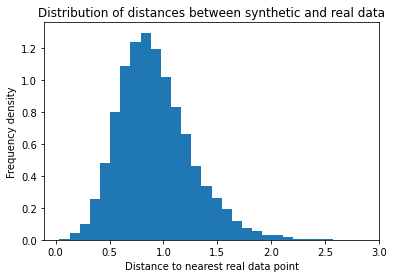

In [204]:
import matplotlib.pyplot as plt

plt.hist(distances, bins=30, density=True)
plt.xlabel('Distance to nearest real data point')
plt.ylabel('Frequency density')
plt.title('Distribution of distances between synthetic and real data')
plt.show()

In [205]:
from sklearn.preprocessing import StandardScaler

def standardize_data(group_real_FEB, group_synth_AUG):
    scaler = StandardScaler()
    X_real_std = scaler.fit_transform(group_real_AUG)
    X_synthetic_std = scaler.transform(group_synth_AUG)
    return X_real_std, X_synthetic_std

In [206]:
from sklearn.neighbors import NearestNeighbors

def calculate_distances(X_real_std, X_synthetic_std):
    nn = NearestNeighbors(n_neighbors=1, algorithm='auto').fit(X_real_std)
    distances, _ = nn.kneighbors(X_synthetic_std)
    return distances.flatten()

In [207]:
X_real_std, X_synthetic_std = standardize_data(group_real_AUG, group_synth_AUG)
distances = calculate_distances(X_real_std, X_synthetic_std)

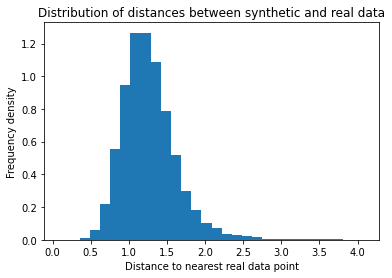

In [208]:
import matplotlib.pyplot as plt

plt.hist(distances, bins=30, density=True)
plt.xlabel('Distance to nearest real data point')
plt.ylabel('Frequency density')
plt.title('Distribution of distances between synthetic and real data')
plt.show()

## Calculate Euclidean Distance

In [129]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import euclidean

In [130]:
def calculate_distances(group_real_FEB, group_synth_FEB):
    scaler = StandardScaler()
    real_data_std = scaler.fit_transform(group_real_FEB)
    synthetic_data_std = scaler.transform(group_synth_FEB)
    
    distances = [euclidean(r, s) for r, s in zip(real_data_std, synthetic_data_std)]
    return distances

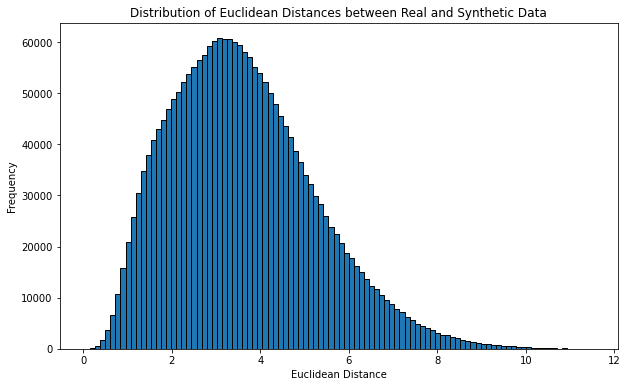

In [195]:
# Assume real_data and synthetic_data are your datasets
distances = calculate_distances(group_real_FEB, group_synth_FEB)

plt.figure(figsize=(10, 6))
plt.hist(distances, bins=100, edgecolor='black')
plt.xlabel('Euclidean Distance')
plt.ylabel('Frequency')
plt.title('Distribution of Euclidean Distances between Real and Synthetic Data')
plt.show()

In [136]:
def calculate_distances(group_real_AUG, group_synth_AUG):
    scaler = StandardScaler()
    real_data_std = scaler.fit_transform(group_real_AUG)
    synthetic_data_std = scaler.transform(group_synth_AUG)
    
    distances = [euclidean(r, s) for r, s in zip(real_data_std, synthetic_data_std)]
    return distances

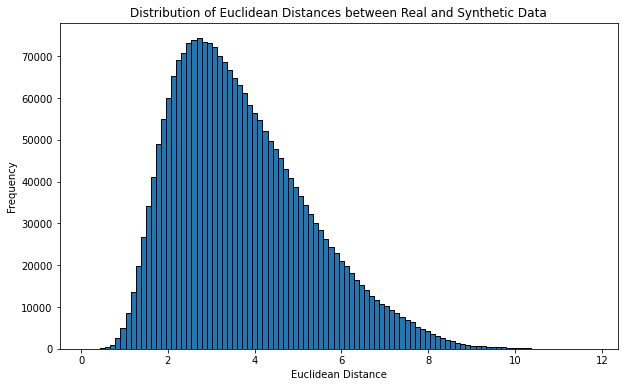

In [196]:
# Assume real_data and synthetic_data are your datasets
distances = calculate_distances(group_real_AUG, group_synth_AUG)

plt.figure(figsize=(10, 6))
plt.hist(distances, bins=100, edgecolor='black')
plt.xlabel('Euclidean Distance')
plt.ylabel('Frequency')
plt.title('Distribution of Euclidean Distances between Real and Synthetic Data')
plt.show()

In [140]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist

In [141]:
def calculate_distances(real_data, synthetic_data):
    scaler = StandardScaler()
    real_data_std = scaler.fit_transform(real_data)
    synthetic_data_std = scaler.transform(synthetic_data)
    
    distances = cdist(real_data_std, synthetic_data_std, metric='euclidean')
    return distances.flatten()

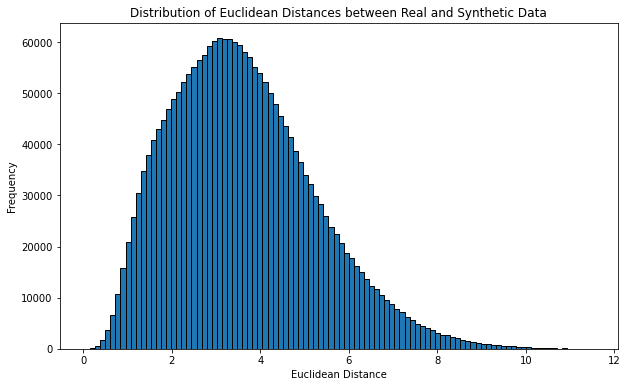

In [191]:
# Assume real_data and synthetic_data are your datasets with different sizes
distances = calculate_distances(group_real_FEB, group_synth_FEB)

plt.figure(figsize=(10, 6))
plt.hist(distances, bins=100, edgecolor='black')
plt.xlabel('Euclidean Distance')
plt.ylabel('Frequency')
plt.title('Distribution of Euclidean Distances between Real and Synthetic Data')
plt.show()

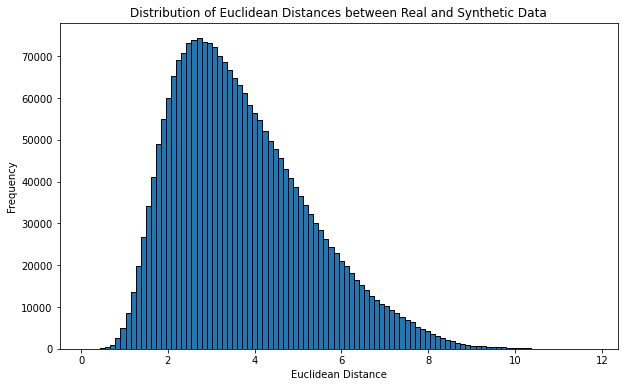

In [194]:
# Assume real_data and synthetic_data are your datasets with different sizes
distances = calculate_distances(group_real_AUG, group_synth_AUG)

plt.figure(figsize=(10, 6))
plt.hist(distances, bins=100, edgecolor='black')
plt.xlabel('Euclidean Distance')
plt.ylabel('Frequency')
plt.title('Distribution of Euclidean Distances between Real and Synthetic Data')
plt.show()

## Evaluate Cross-validation results

In [148]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [149]:
def evaluate_dataset(X, y, model, cv=10):
    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    return scores

In [153]:
#model = MultiOutputRegressor(KNeighborsRegressor())
#real_scores = evaluate_dataset(X_real, y_real, model)
#synthetic_scores = evaluate_dataset(X_synthetic, y_synthetic, model)

In [154]:
#print("Real Data CV Accuracy: {:.3f} ({:.3f})".format(np.mean(real_scores), np.std(real_scores)))
#print("Synthetic Data CV Accuracy: {:.3f} ({:.3f})".format(np.mean(synthetic_scores), np.std(synthetic_scores)))

## 해링거 거리 측정 (합성데이터 품질)

In [193]:
import numpy as np
from scipy.stats import entropy

def hellinger_distance(p, q):
    return np.sqrt(np.sum((np.sqrt(p) - np.sqrt(q)) ** 2)) / np.sqrt(2)

def evaluate_synthetic_data(real_data, synthetic_data):
    # 히스토그램 계산
    real_hist, _ = np.histogram(real_data, bins=100, density=True)
    synthetic_hist, _ = np.histogram(synthetic_data, bins=100, density=True)
    
    # 해링거 거리 계산
    hd = hellinger_distance(real_hist, synthetic_hist)
    
    # 품질 점수 계산 (0에 가까울수록 유사)
    quality_score = 1 - hd
    
    return quality_score

# 실제 데이터와 합성 데이터 준비 (예시)
#real_data = np.random.normal(0, 1, 1000)
#synthetic_data = np.random.normal(0, 1.1, 2000)

real_data = group_real_FEB
synthetic_data = group_synth_FEB


# 품질 점수 계산
quality_score = evaluate_synthetic_data(real_data, synthetic_data)

print(f"합성 데이터 품질 점수: {quality_score:.4f}")

real_data = group_real_AUG
synthetic_data = group_synth_AUG


# 품질 점수 계산
quality_score = evaluate_synthetic_data(real_data, synthetic_data)

print(f"합성 데이터 품질 점수: {quality_score:.4f}")

합성 데이터 품질 점수: 0.3486
합성 데이터 품질 점수: 0.7536


In [53]:
#reshape_ocean_df_AUG

In [54]:
#reshape_ocean_df_AUG

In [55]:
reshape_ocean_df_test_FEB=reshape_ocean_df_test_FEB[(reshape_ocean_df_test_FEB["Station-Point"]=='104-08')|(reshape_ocean_df_test_FEB["Station-Point"]=='104-09')|(reshape_ocean_df_test_FEB["Station-Point"]=='104-10')|(reshape_ocean_df_test_FEB["Station-Point"]=='105-08')|(reshape_ocean_df_test_FEB["Station-Point"]=='105-09')|(reshape_ocean_df_test_FEB["Station-Point"]=='105-10')]
reshape_ocean_df_test_APR=reshape_ocean_df_test_APR[(reshape_ocean_df_test_APR["Station-Point"]=='104-08')|(reshape_ocean_df_test_APR["Station-Point"]=='104-09')|(reshape_ocean_df_test_APR["Station-Point"]=='104-10')|(reshape_ocean_df_test_APR["Station-Point"]=='105-08')|(reshape_ocean_df_test_APR["Station-Point"]=='105-09')|(reshape_ocean_df_test_APR["Station-Point"]=='105-10')]
reshape_ocean_df_test_JUN=reshape_ocean_df_test_JUN[(reshape_ocean_df_test_JUN["Station-Point"]=='104-08')|(reshape_ocean_df_test_JUN["Station-Point"]=='104-09')|(reshape_ocean_df_test_JUN["Station-Point"]=='104-10')|(reshape_ocean_df_test_JUN["Station-Point"]=='105-08')|(reshape_ocean_df_test_JUN["Station-Point"]=='105-09')|(reshape_ocean_df_test_JUN["Station-Point"]=='105-10')]
reshape_ocean_df_test_AUG=reshape_ocean_df_test_AUG[(reshape_ocean_df_test_AUG["Station-Point"]=='104-08')|(reshape_ocean_df_test_AUG["Station-Point"]=='104-09')|(reshape_ocean_df_test_AUG["Station-Point"]=='104-10')|(reshape_ocean_df_test_AUG["Station-Point"]=='105-08')|(reshape_ocean_df_test_AUG["Station-Point"]=='105-09')|(reshape_ocean_df_test_AUG["Station-Point"]=='105-10')]
reshape_ocean_df_test_OCT=reshape_ocean_df_test_OCT[(reshape_ocean_df_test_OCT["Station-Point"]=='104-08')|(reshape_ocean_df_test_OCT["Station-Point"]=='104-09')|(reshape_ocean_df_test_OCT["Station-Point"]=='104-10')|(reshape_ocean_df_test_OCT["Station-Point"]=='105-08')|(reshape_ocean_df_test_OCT["Station-Point"]=='105-09')|(reshape_ocean_df_test_OCT["Station-Point"]=='105-10')]
reshape_ocean_df_test_DEC=reshape_ocean_df_test_DEC[(reshape_ocean_df_test_DEC["Station-Point"]=='104-08')|(reshape_ocean_df_test_DEC["Station-Point"]=='104-09')|(reshape_ocean_df_test_DEC["Station-Point"]=='104-10')|(reshape_ocean_df_test_DEC["Station-Point"]=='105-08')|(reshape_ocean_df_test_DEC["Station-Point"]=='105-09')|(reshape_ocean_df_test_DEC["Station-Point"]=='105-10')]

In [56]:
#reshape_ocean_df_test_AUG

In [57]:
# get the dataset
def get_syn_dataset(station,season):
    #X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
    #X,y=
    if (season=='FEB') : temp=model_output_df_FEB[(model_output_df_FEB['Station-Point']==station)&(model_output_df_FEB['DATE'].str.contains("-02-"))]
    if (season=='APR') : temp=model_output_df_APR[(model_output_df_APR['Station-Point']==station)&(model_output_df_APR['DATE'].str.contains("-04-"))]
    if (season=='JUN') : temp=model_output_df_JUN[(model_output_df_JUN['Station-Point']==station)&(model_output_df_JUN['DATE'].str.contains("-06-"))]
    if (season=='AUG') : temp=model_output_df_AUG[(model_output_df_AUG['Station-Point']==station)&(model_output_df_AUG['DATE'].str.contains("-08-"))]
    if (season=='OCT') : temp=model_output_df_OCT[(model_output_df_OCT['Station-Point']==station)&(model_output_df_OCT['DATE'].str.contains("-10-"))]
    if (season=='DEC') : temp=model_output_df_DEC[(model_output_df_DEC['Station-Point']==station)&(model_output_df_DEC['DATE'].str.contains("-12-"))]            
    #elif (season=='APR'):
    #                     temp=reshape_ocean_df[(reshape_ocean_df['Station-Point']==str(station))&(reshape_ocean_df['DATE'].str.contains("-04-"))]
    
    
    
    X=temp[['0','SSH']]
    y=temp[['10','20','30','50','75','100','125','150','200','250']]
    #y=temp
    return X,y

In [58]:
# get the dataset
def get_org_dataset(station,season):
    #X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
    #X,y=
    if (season=='FEB') : temp=reshape_ocean_df_FEB[(reshape_ocean_df_FEB['Station-Point']==station)&(reshape_ocean_df_FEB['DATE'].str.contains("-02-"))]
    elif (season=='APR') : temp=reshape_ocean_df_APR[(reshape_ocean_df_APR['Station-Point']==station)&(reshape_ocean_df_APR['DATE'].str.contains("-04-"))]
    elif (season=='JUN') : temp=reshape_ocean_df_JUN[(reshape_ocean_df_JUN['Station-Point']==station)&(reshape_ocean_df_JUN['DATE'].str.contains("-06-"))]
    elif (season=='AUG') : temp=reshape_ocean_df_AUG[(reshape_ocean_df_AUG['Station-Point']==station)&(reshape_ocean_df_AUG['DATE'].str.contains("-08-"))]
    elif (season=='OCT') : temp=reshape_ocean_df_OCT[(reshape_ocean_df_OCT['Station-Point']==station)&(reshape_ocean_df_OCT['DATE'].str.contains("-10-"))]
    elif (season=='DEC') : temp=reshape_ocean_df_DEC[(reshape_ocean_df_DEC['Station-Point']==station)&(reshape_ocean_df_DEC['DATE'].str.contains("-12-"))]            
    #elif (season=='APR'):
    #                     temp=reshape_ocean_df[(reshape_ocean_df['Station-Point']==str(station))&(reshape_ocean_df['DATE'].str.contains("-04-"))]
    
    
    
    X=temp[['0','SSH']]
    y=temp[['10','20','30','50','75','100','125','150','200','250']]
    #y=temp
    return X,y

In [59]:
# get the dataset
def get_date_dataset(station,season):
    #X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
    #X,y=
    if (season=='FEB') : temp=reshape_ocean_df_FEB[(reshape_ocean_df_FEB['Station-Point']==station)&(reshape_ocean_df_FEB['DATE'].str.contains("-02-"))]
    elif (season=='APR') : temp=reshape_ocean_df_APR[(reshape_ocean_df_APR['Station-Point']==station)&(reshape_ocean_df_APR['DATE'].str.contains("-04-"))]
    elif (season=='JUN') : temp=reshape_ocean_df_JUN[(reshape_ocean_df_JUN['Station-Point']==station)&(reshape_ocean_df_JUN['DATE'].str.contains("-06-"))]
    elif (season=='AUG') : temp=reshape_ocean_df_AUG[(reshape_ocean_df_AUG['Station-Point']==station)&(reshape_ocean_df_AUG['DATE'].str.contains("-08-"))]
    elif (season=='OCT') : temp=reshape_ocean_df_OCT[(reshape_ocean_df_OCT['Station-Point']==station)&(reshape_ocean_df_OCT['DATE'].str.contains("-10-"))]
    elif (season=='DEC') : temp=reshape_ocean_df_DEC[(reshape_ocean_df_DEC['Station-Point']==station)&(reshape_ocean_df_DEC['DATE'].str.contains("-12-"))]            
    #elif (season=='APR'):
    #                     temp=reshape_ocean_df[(reshape_ocean_df['Station-Point']==str(station))&(reshape_ocean_df['DATE'].str.contains("-04-"))]
    
    
    
    X=temp[['Station-Point','DATE']]
    #y=temp[['10','20','30','50','75','100','125','150','200','250']]
    #y=temp
    return X

In [60]:
X, y = get_syn_dataset("104-08","FEB")

In [61]:
X

,0,SSH
0,12.1548,0.646930
1,12.5851,0.637703
2,11.0439,0.585079
3,10.5806,0.534653
4,11.1286,0.640520
...,...,...
3995,11.2281,0.603841
3996,10.7120,0.579801
3997,11.6508,0.580828
3998,11.8029,0.524884


In [62]:
# compare ensemble to each standalone models for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import StackingRegressor
from matplotlib import pyplot
from sklearn.ensemble import AdaBoostRegressor,BaggingRegressor,ExtraTreesRegressor
from xgboost import XGBRegressor

In [63]:
# get a list of models to evaluate
def get_models():
    models=dict()
    models['knn']=MultiOutputRegressor(KNeighborsRegressor())
#    models['cart']=MultiOutputRegressor(DecisionTreeRegressor())
    models['svm']=MultiOutputRegressor(LinearSVR())
    models['rf']=MultiOutputRegressor(RandomForestRegressor())
    models['lr']=MultiOutputRegressor(LinearRegression())
    return models

In [64]:
#evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    #define the evaluation procedure
    cv=RepeatedKFold(n_splits=10,n_repeats=3, random_state=42)
    #evaluate the model and collect the results
    scores=cross_val_score(model, X, y,scoring='neg_mean_absolute_error',cv=cv, n_jobs=-1)
    return scores

In [65]:
#evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    #define the evaluation procedure
    cv=RepeatedKFold(n_splits=10,n_repeats=3, random_state=42)
    #evaluate the model and collect the results
    scores1=cross_val_score(model, X, y,scoring='neg_mean_squared_error',cv=cv, n_jobs=-1)
    scores  = np.sqrt(-1 * scores1)
    return scores

## Single Model (AUG)

>knn 3.600 (0.715)
>svm 3.525 (0.577)
>rf 2.827 (0.783)
>lr 2.435 (0.910)


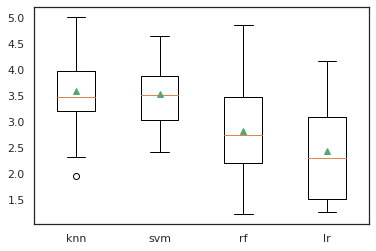

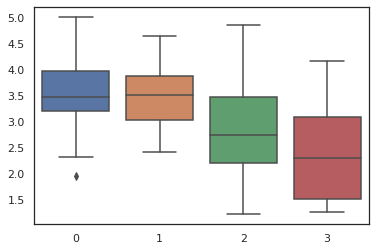

In [66]:
#define dataset
X, y = get_org_dataset("104-08","AUG")
#get the models to evaluate
models=get_models()
#evalute the models and store results
results, names=list(), list()
for name, model in models.items():
    #evalute the model
    scores=evaluate_model(model, X, y)
    #store the results
    results.append(abs(scores))
    names.append(name)
    #summarize the performance alog the way
    print('>%s %.3f (%.3f)' % (name, mean(abs(scores)), std(scores)))

#plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()


df = pd.DataFrame (data=names, columns = ['Single Model'])
df
plt.xticks(range(4), ['KNN', 'SVM', 'RF', 'LR'])
sns.boxplot(data=results)
plt.show()

>knn 2.276 (0.039)
>svm 2.132 (0.037)
>rf 2.267 (0.042)
>lr 2.086 (0.031)


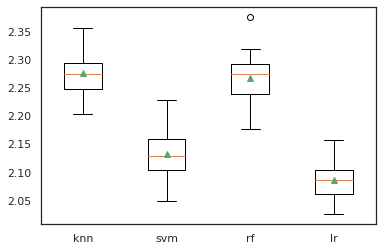

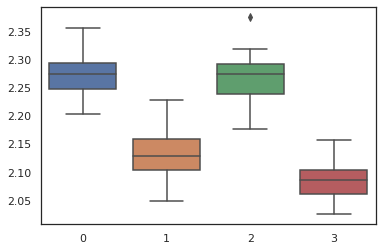

In [67]:
#define dataset
X, y = get_syn_dataset("104-08","AUG")
#get the models to evaluate
models=get_models()
#evalute the models and store results
results, names=list(), list()
for name, model in models.items():
    #evalute the model
    scores=evaluate_model(model, X, y)
    #store the results
    results.append(abs(scores))
    names.append(name)
    #summarize the performance alog the way
    print('>%s %.3f (%.3f)' % (name, mean(abs(scores)), std(scores)))

#plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

df = pd.DataFrame (data=names, columns = ['Single Model'])
df
plt.xticks(range(4), ['KNN', 'SVM', 'RF', 'LR'])
sns.boxplot(data=results)
plt.show()

## Single Model (FEB)

>knn 2.514 (1.037)
>svm 2.425 (1.312)
>rf 1.349 (0.591)
>lr 1.922 (0.641)


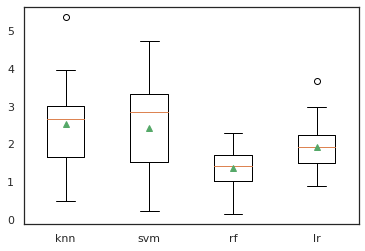

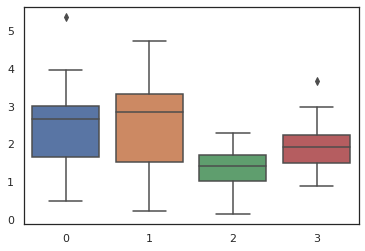

In [68]:
#define dataset
X, y = get_org_dataset("104-08","FEB")
#get the models to evaluate
models=get_models()
#evalute the models and store results
results, names=list(), list()
for name, model in models.items():
    #evalute the model
    scores=evaluate_model(model, X, y)
    #store the results
    results.append(abs(scores))
    names.append(name)
    #summarize the performance alog the way
    print('>%s %.3f (%.3f)' % (name, mean(abs(scores)), std(scores)))

#plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()


df = pd.DataFrame (data=names, columns = ['Single Model'])
df
plt.xticks(range(4), ['KNN','SVM', 'RF', 'LR'])
sns.boxplot(data=results)
plt.show()

>knn 1.668 (0.051)
>svm 1.667 (0.057)
>rf 1.666 (0.048)
>lr 1.529 (0.046)


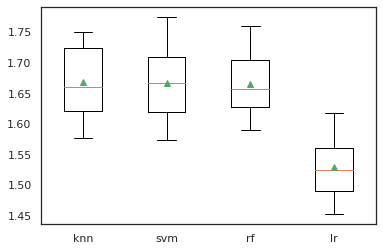

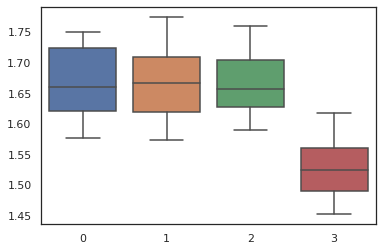

In [69]:
#define dataset
X, y = get_syn_dataset("104-08","FEB")
#get the models to evaluate
models=get_models()
#evalute the models and store results
results, names=list(), list()
for name, model in models.items():
    #evalute the model
    scores=evaluate_model(model, X, y)
    #store the results
    results.append(abs(scores))
    names.append(name)
    #summarize the performance alog the way
    print('>%s %.3f (%.3f)' % (name, mean(abs(scores)), std(scores)))

#plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

df = pd.DataFrame (data=names, columns = ['Single Model'])
df
plt.xticks([1],['ln', 'cart', 'svm', 'stacking'])
sns.boxplot(data=results)
plt.show()

In [70]:
X

,0,SSH
0,12.1548,0.646930
1,12.5851,0.637703
2,11.0439,0.585079
3,10.5806,0.534653
4,11.1286,0.640520
...,...,...
3995,11.2281,0.603841
3996,10.7120,0.579801
3997,11.6508,0.580828
3998,11.8029,0.524884


In [71]:
names

['knn', 'svm', 'rf', 'lr']

In [72]:
# get the dataset
def get_dataset(station,season):
    #X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
    #X,y=
    if (season=='FEB') : temp=reshape_ocean_df_FEB[(reshape_ocean_df_FEB['Station-Point']==station)&(reshape_ocean_df_FEB['DATE'].str.contains("-02-"))]
    #elif (season=='APR'):
    #                     temp=reshape_ocean_df[(reshape_ocean_df['Station-Point']==str(station))&(reshape_ocean_df['DATE'].str.contains("-04-"))]
    
    
    
    X=temp[['0','SSH']]
    y=temp[['10','20','30','50','75','100','125','150','200','250']]
    #y=temp
    return X,y

>knn 1.668 (0.051)
>svm 1.665 (0.058)
>rf 1.665 (0.047)
>lr 1.529 (0.046)


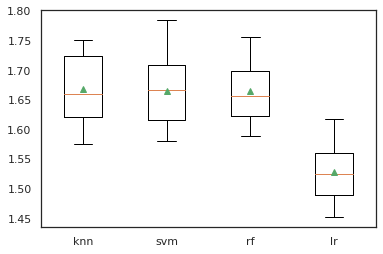

In [73]:
#define dataset
X, y = get_syn_dataset("104-08","FEB")
#get the models to evaluate
models=get_models()
#evalute the models and store results
results, names=list(), list()
for name, model in models.items():
    #evalute the model
    scores=evaluate_model(model, X, y)
    #store the results
    results.append(scores)
    names.append(name)
    #summhttp://147.46.93.143:8888/notebooks/Frontier_Jounral_2022_04_08.ipynb#arize the performance alog the way
    print('>%s %.3f (%.3f)' % (name, abs(mean(scores)), std(scores)))

#plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>knn 2.514 (1.037)
>svm 2.426 (1.313)
>rf 1.337 (0.600)
>lr 1.922 (0.641)


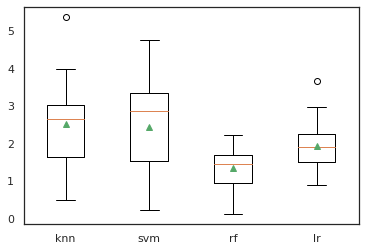

In [74]:
#define dataset
X, y = get_org_dataset("104-08","FEB")
#get the models to evaluate
models=get_models()
#evalute the models and store results
results, names=list(), list()
for name, model in models.items():
    #evalute the model
    scores=evaluate_model(model, X, y)
    #store the results
    results.append(scores)
    names.append(name)
    #summarize the performance alog the way
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

#plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [75]:
#Usual Imports
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import VotingRegressor,GradientBoostingRegressor,HistGradientBoostingRegressor,StackingRegressor
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,accuracy_score
from sklearn.ensemble import AdaBoostRegressor,BaggingRegressor,ExtraTreesRegressor
from xgboost import XGBRegressor
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import Sequential
from keras.metrics import RootMeanSquaredError
import warnings
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
warnings.filterwarnings('ignore')

In [76]:
X, y = get_syn_dataset("104-08","FEB")

In [77]:
from sklearn.multioutput import RegressorChain
from sklearn.multioutput import MultiOutputRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor
from matplotlib import pyplot
#Regression Chain Model

level0 = list()
#level0.append(('lin_reg', RegressorChain(SVR())))
level0.append(('knn_reg', RegressorChain(KNeighborsRegressor())))
level0.append(('rnd_reg', RegressorChain(RandomForestRegressor(n_estimators=100, random_state=5))))
level0.append((('svr_reg',  RegressorChain(SVR(kernel = 'rbf')))))

#in_reg=RegressorChain(LinearRegression())
#nn_reg=RegressorChain(KNeighborsRegressor())
#nd_reg=RegressorChain(RandomForestRegressor(n_estimators=100, random_state=5))
#vr_reg=RegressorChain(SVR(kernel = 'rbf'))

reg=MultiOutputRegressor(StackingRegressor(estimators=level0, final_estimator=LinearRegression()))

reg.estimator.estimators_=reg.estimator.estimators
reg.estimator.final_estimator_=reg.estimator.final_estimator
reg.estimator.stack_method_=reg.estimator.stack_method

In [78]:
reg.fit(X,y)

IndexError: tuple index out of range

In [79]:
X, y = get_org_dataset("104-08","FEB")

In [80]:
X

,0,SSH
135,11.8400,0.6157
141,11.6300,0.4363
152,10.0800,0.4655
158,10.6300,0.5049
164,12.0300,0.5253
169,11.2800,0.6374
180,11.1100,0.6927
190,9.5700,0.5332
194,10.6800,0.6374
203,10.6300,0.5917


In [81]:
y

,10,20,30,50,75,100,125,150,200,250
135,11.9100,11.7600,11.8100,11.8100,11.8000,11.7000,11.9100,11.8100,11.8100,10.7900
141,10.9000,9.2800,8.0600,7.1600,6.1100,4.2900,3.3000,2.6400,1.8400,1.4300
152,10.0800,10.0800,10.0800,9.9500,9.1800,8.2500,6.9000,4.3700,1.9900,1.3100
158,10.6100,10.6100,10.5400,10.2800,5.5300,2.9400,2.3500,1.6800,1.1800,0.9600
164,12.0300,12.0300,12.0400,12.0300,12.0200,10.6500,8.1200,4.6200,2.2100,1.3100
169,11.2900,11.2900,11.3000,11.3100,11.3100,11.2900,11.2600,11.2700,11.3400,6.8400
180,11.1100,11.1100,11.1100,11.1100,11.1100,11.1100,11.0800,11.0700,10.5300,7.2600
190,9.5900,9.6300,9.6400,9.6400,9.6000,9.4000,9.2300,7.3700,2.2300,1.3400
194,10.8200,10.8000,10.7900,10.7800,10.7600,10.7500,10.7500,10.7400,10.3100,7.3700
203,10.6300,10.6300,10.6100,10.5100,10.5000,10.4800,10.4500,10.3100,8.9400,4.1400


In [82]:
X, y = get_syn_dataset("104-08","AUG")

In [83]:
y

,10,20,30,50,75,100,125,150,200,250
0,24.8238,24.2685,19.2255,14.0794,7.5558,7.5558,4.7891,2.2965,1.0500,0.8140
1,25.2666,22.1336,13.3056,11.6941,11.6941,3.6361,2.7864,1.9004,1.3650,0.9150
2,20.3613,15.9681,12.5387,12.5387,12.5387,8.8721,7.1364,5.1296,3.4602,1.6064
3,24.3815,24.3815,19.1738,15.0183,13.1912,9.2081,6.8417,3.8515,1.3426,0.8862
4,21.1183,16.7710,16.7710,14.0630,14.0630,12.7758,11.7048,10.6300,5.6568,2.2331
...,...,...,...,...,...,...,...,...,...,...
3995,21.3117,21.3117,14.1943,13.9305,10.3075,10.3075,9.1158,8.3259,2.3778,2.3058
3996,21.2951,21.2951,16.1169,16.1169,10.1961,10.1961,10.1961,5.8230,2.0809,1.2211
3997,21.1157,18.4331,14.9454,13.5580,10.9041,6.6799,6.6799,4.9699,1.0500,1.0500
3998,18.4934,16.6005,16.5890,13.3822,13.3744,7.7065,7.7065,2.2126,2.0030,1.3896


In [84]:
#define dataset
#X, y=make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=1)

#define the base models
level0=list()
level0.append(('knn',KNeighborsRegressor()))
level0.append(('rf',RandomForestRegressor()))
level0.append(('svm',SVR()))

#define meta learner model
level1=LinearRegression()
#define the stacking ensemble
cv=RepeatedKFold(n_splits=10,n_repeats=3, random_state=1)
model=MultiOutputRegressor(StackingRegressor(estimators=level0, final_estimator=level1, cv=5))
model.estimator.final_estimator_ = model.estimator.final_estimator
model.fit(X,y)
#scores=cross_val_score(model, X, y,scoring='neg_mean_absolute_error',cv=cv, n_jobs=-1)


#make a prediction for one example
val = [11.6300, 0.4363]

yhat=model.predict([val])

In [85]:
# dataset
#X, y=make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=1)

#define the base models
level0=list()
level0.append(('knn',KNeighborsRegressor()))
level0.append(('rf',RandomForestRegressor()))
level0.append(('svm',SVR()))

#define meta learner model
level1=LinearRegression()
#define the stacking ensemble
cv=RepeatedKFold(n_splits=10,n_repeats=3, random_state=1)
model=MultiOutputRegressor(StackingRegressor(estimators=level0, final_estimator=level1, cv=5))
model.estimator.final_estimator_ = model.estimator.final_estimator
model.fit(X,y)
#scores=cross_val_score(model, X, y,scoring='neg_mean_absolute_error',cv=cv, n_jobs=-1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42
)
model.fit(X_train, y_train).score(X_test, y_test)

#y_pred = model.predict(X_test)

#RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
#MAE = metrics.mean_absolute_error(y_test, y_pred)

#make a prediction for one example
#val = [11.6300, 0.4363]

#yhat=model.predict([val])

0.27314825370887597

In [86]:
X, y = get_syn_dataset("104-08","AUG")

In [107]:
# dataset
#X, y=make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=1)

#define the base models
level0=list()
level0.append(('knn',KNeighborsRegressor()))
level0.append(('rf',RandomForestRegressor()))
level0.append(('svm',SVR()))

#define meta learner model
level1=LinearRegression()
#define the stacking ensemble
cv=RepeatedKFold(n_splits=10,n_repeats=3, random_state=1)
model=MultiOutputRegressor(StackingRegressor(estimators=level0, final_estimator=level1, cv=5))
model.estimator.final_estimator_ = model.estimator.final_estimator
model.fit(X,y)
#scores=cross_val_score(model, X, y,scoring='neg_mean_absolute_error',cv=cv, n_jobs=-1)

MultiOutputRegressor(estimator=StackingRegressor(cv=5,
                                                 estimators=[('knn',
                                                              KNeighborsRegressor()),
                                                             ('rf',
                                                              RandomForestRegressor()),
                                                             ('svm', SVR())],
                                                 final_estimator=LinearRegression()))

In [108]:
X, y = get_org_dataset("104-08","AUG")

In [109]:
def get_stacking():
    #define the base models
    level0=list()
    level0.append(('knn',KNeighborsRegressor()))
    level0.append(('cart',DecisionTreeRegressor()))
    level0.append(('svm',SVR()))
    #define meta learner model
    level1=LinearRegression()
    #define the stacking ensemble
    model=MultiOutputRegressor(StackingRegressor(estimators=level0, final_estimator=level1, cv=5))
    model.estimator.final_estimator_ = model.estimator.final_estimator
    return model

In [110]:
arr_x_list=X.to_numpy()
arr_y_list=y.to_numpy()
results_yhat=list()
X

,0,SSH
138,18.8900,0.4060
144,25.7500,0.5228
149,23.2800,0.5955
155,24.3000,0.4849
161,25.3400,0.5744
166,23.7400,0.5022
172,24.2600,0.7317
177,23.1100,0.6728
187,21.9500,0.7082
197,26.7200,0.6900


In [111]:
X, y = get_org_test_dataset("104-08","AUG")

NameError: name 'get_org_test_dataset' is not defined

In [92]:
arr_x_list=X.to_numpy()
arr_y_list=y.to_numpy()
results_yhat=list()
X

,0,SSH
138,18.8900,0.4060
144,25.7500,0.5228
149,23.2800,0.5955
155,24.3000,0.4849
161,25.3400,0.5744
166,23.7400,0.5022
172,24.2600,0.7317
177,23.1100,0.6728
187,21.9500,0.7082
197,26.7200,0.6900


In [93]:
import numpy as np
for idx in range(len(X)):
#make a prediction for X-array
    val = [arr_x_list[idx][0], arr_x_list[idx][1]]
    print(val)
    yhat=model.predict([val])
    results_yhat.append(yhat)

[18.89, 0.406]
[25.75, 0.5228]
[23.28, 0.5955]
[24.3, 0.4849]
[25.34, 0.5744]
[23.74, 0.5022]
[24.26, 0.7317]
[23.11, 0.6728000000000001]
[21.95, 0.7082]
[26.72, 0.6900000000000001]
[25.6014, 0.6114]
[25.4842, 0.6687000000000001]
[25.3449, 0.8052]
[24.6739, 0.6924]
[27.0142, 0.8278000000000001]


In [94]:
arr_x_list=X.to_numpy()
arr_y_list=y.to_numpy()

In [95]:
val[0]

27.0142

In [96]:
arr_org_list=y.to_numpy()

In [97]:
X

,0,SSH
138,18.8900,0.4060
144,25.7500,0.5228
149,23.2800,0.5955
155,24.3000,0.4849
161,25.3400,0.5744
166,23.7400,0.5022
172,24.2600,0.7317
177,23.1100,0.6728
187,21.9500,0.7082
197,26.7200,0.6900


In [98]:
arr_org_list[[1]]

array([[25.48, 25.3 , 12.9 ,  9.96,  5.7 ,  3.35,  2.7 ,  2.6 ,  2.54,
         1.9 ]])

## Ensemble Stacking

In [99]:
A=mean_squared_error(arr_org_list[[0]], yhat)**0.5
B=mean_squared_error(arr_org_list[[1]], yhat)**0.5
C=mean_squared_error(arr_org_list[[2]], yhat)**0.5
D=mean_squared_error(arr_org_list[[3]], yhat)**0.5
E=mean_squared_error(arr_org_list[[4]], yhat)**0.5

In [100]:
print((A+B+C+D+E)/5)

5.172257546137921


In [101]:
A=mean_absolute_error(arr_org_list[[0]], yhat)
B=mean_absolute_error(arr_org_list[[1]], yhat)
C=mean_absolute_error(arr_org_list[[2]], yhat)
D=mean_absolute_error(arr_org_list[[3]], yhat)
E=mean_absolute_error(arr_org_list[[4]], yhat)

NameError: name 'mean_absolute_error' is not defined

In [102]:
print((A+B+C+D+E)/5)

5.172257546137921


In [103]:
y

,10,20,30,50,75,100,125,150,200,250
138,18.4100,15.8800,15.7800,6.5000,4.6600,3.0600,2.7000,2.1800,1.6700,1.2900
144,25.4800,25.3000,12.9000,9.9600,5.7000,3.3500,2.7000,2.6000,2.5400,1.9000
149,22.4600,18.8000,17.0900,15.2500,13.1900,11.5300,10.7700,9.9000,5.1900,2.9300
155,21.9500,14.9100,12.0100,7.9500,5.2200,3.5600,2.2800,1.6500,1.0700,0.8000
161,25.3100,21.7500,15.8800,11.1200,5.9800,3.5500,2.6500,1.9700,1.2100,0.9800
166,21.7100,16.8600,11.7900,7.2100,4.6700,2.8200,1.9000,1.4300,1.0500,0.8500
172,24.2100,24.2500,20.5800,16.0300,14.9600,12.3400,10.6100,7.5800,2.1700,1.3200
177,19.8500,16.9300,12.9100,11.4700,11.0900,10.8600,10.8200,10.6300,9.1200,4.6400
187,21.9200,19.3600,17.3300,15.7500,14.5400,12.4000,11.1900,10.3200,5.7100,2.1100
197,22.5200,17.1100,15.6600,14.8700,13.2000,10.2700,7.1800,4.5500,1.6300,1.0500


In [104]:
X, y = get_syn_dataset("104-08","FEB")

In [105]:
X_org, y_org=get_org_test_dataset("104-08","FEB")

NameError: name 'get_org_test_dataset' is not defined

In [106]:
arr_org_list=y_org.to_numpy()
arr_org_x_list=X_org.to_numpy()

NameError: name 'y_org' is not defined

In [ ]:
arr_org_list

In [ ]:
arr_org_list

In [ ]:
arr_org_list

In [ ]:
results_yhat

In [ ]:
from sklearn.metrics import mean_absolute_error
sum_rmse=0
sum_mae=0
for idx in range(len(X_org)):
    #mean_squared_error(arr_org_list[[0]], [results_yhat[idx][0]], squared=False)
    sum_rmse=sum_rmse+mean_squared_error(arr_org_list[[0]], [results_yhat[idx][0]], squared=True)
    sum_mae=sum_mae+mean_absolute_error(arr_org_list[[0]], [results_yhat[idx][0]])

print('>%s %.3f' % ('RMSE:', sum_rmse/len(X)))
print('>%s %.3f' % ('MAE:', sum_mae/len(X)))

In [ ]:
import matplotlib.pyplot as plt
data_df=pd.DataFrame(yhat,columns=['10','20','30','50','75','100','125','150','200','250'])
surface={'0':val[0]}
temp_df=pd.DataFrame()
temp_df=temp_df.append(surface, ignore_index=True)

data_df=pd.concat([temp_df,data_df], axis=1)

df=pd.DataFrame(data_df)
tmp=[]
tmp2=[]

df

In [ ]:
data_df=pd.DataFrame([results_yhat[1][0]],columns=['10','20','30','50','75','100','125','150','200','250'])

In [ ]:
import matplotlib.pyplot as plt
data_df=pd.DataFrame(yhat,columns=['10','20','30','50','75','100','125','150','200','250'])
surface={'0':val[0]}
temp_df=pd.DataFrame()
temp_df=temp_df.append(surface, ignore_index=True)

data_df=pd.concat([temp_df,data_df], axis=1)

df=pd.DataFrame(data_df)
tmp=[]
tmp2=[]

df

In [ ]:
X_Date=get_date_dataset('104-08','FEB')
X_Date['DATE'].iloc[0]

In [ ]:
# get the dataset
def get_date_test_dataset(station,season):
    #X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
    #X,y=
    if (season=='FEB') : temp=reshape_ocean_df_test_FEB[(reshape_ocean_df_test_FEB['Station-Point']==station)&(reshape_ocean_df_test_FEB['DATE'].str.contains("-02-"))]
    elif (season=='APR') : temp=reshape_ocean_df_test_APR[(reshape_ocean_df_test_APR['Station-Point']==station)&(reshape_ocean_df_test_APR['DATE'].str.contains("-04-"))]
    elif (season=='JUN') : temp=reshape_ocean_df_test_JUN[(reshape_ocean_df_test_JUN['Station-Point']==station)&(reshape_ocean_df_test_JUN['DATE'].str.contains("-06-"))]
    elif (season=='AUG') : temp=reshape_ocean_df_test_AUG[(reshape_ocean_df_test_AUG['Station-Point']==station)&(reshape_ocean_df_test_AUG['DATE'].str.contains("-08-"))]
    elif (season=='OCT') : temp=reshape_ocean_df_test_OCT[(reshape_ocean_df_test_OCT['Station-Point']==station)&(reshape_ocean_df_test_OCT['DATE'].str.contains("-10-"))]
    elif (season=='DEC') : temp=reshape_ocean_df_test_DEC[(reshape_ocean_df_test_DEC['Station-Point']==station)&(reshape_ocean_df_test_DEC['DATE'].str.contains("-12-"))]            
    #elif (season=='APR'):
    #                     temp=reshape_ocean_df[(reshape_ocean_df['Station-Point']==str(station))&(reshape_ocean_df['DATE'].str.contains("-04-"))]
    
    
    
    X=temp[['Station-Point','DATE']]
    #y=temp[['10','20','30','50','75','100','125','150','200','250']]
    #y=temp
    return X

In [ ]:
X_Date=get_date_test_dataset('104-08','FEB')
X_Date['DATE'].iloc[0]

In [ ]:
tmp=[]
tmp2=[]
for idx in range(len(X_org)):
        data_df=pd.DataFrame([results_yhat[idx][0]],columns=['10','20','30','50','75','100','125','150','200','250'])
        surface={'0':arr_x_list[idx][0]}
        temp_df=pd.DataFrame()
        temp_df=temp_df.append(surface, ignore_index=True)
        data_df=pd.concat([temp_df,data_df], axis=1)
        df=pd.DataFrame(data_df)
        for index, row in df.iterrows():
            tmp.append(row['0'])
            tmp.append(row['10'])
            tmp.append(row['20'])
            tmp.append(row['30'])
            tmp.append(row['50'])
            tmp.append(row['75'])
            tmp.append(row['100'])
            tmp.append(row['125'])
            tmp.append(row['150'])
            tmp.append(row['200'])
            tmp.append(row['250'])
    
            tmp2.append(arr_org_x_list[idx][0])
            tmp2.append(arr_org_list[idx][0])
            tmp2.append(arr_org_list[idx][1])
            tmp2.append(arr_org_list[idx][2])
            tmp2.append(arr_org_list[idx][3])
            tmp2.append(arr_org_list[idx][4])
            tmp2.append(arr_org_list[idx][5])
            tmp2.append(arr_org_list[idx][6])
            tmp2.append(arr_org_list[idx][7])
            tmp2.append(arr_org_list[idx][8])
            tmp2.append(arr_org_list[idx][9])
    
            Depth  = [0, 10,  20,  30,  50, 75, 100, 125, 150, 200, 250 ]
            fig = plt.figure()
            plt.title(X_Date['DATE'].iloc[idx],fontsize=15, fontstyle='italic',color='Black')
            ax = fig.add_subplot(111)
            ax.plot(tmp, Depth, 'go--')
            ax.plot(tmp2, Depth, 'bo--')
            ax.xaxis.tick_top()
            ax.set_ylabel('depth')
            ax.set_ylim(500, 0)
            ax.set_xlim(0, 25)
            ax.set_xlabel('Sea Temp level [C]')
            ax.figure.legend(['Predicted','True'],bbox_to_anchor=(1,1),bbox_transform=ax.transAxes)
            plt.show()
            tmp=[]
            tmp2=[]

## Original DataSet

In [ ]:
# get the dataset
def get_org_test_dataset(station,season):
    #X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
    #X,y=
    if (season=='FEB') : temp=reshape_ocean_df_test_FEB[(reshape_ocean_df_test_FEB['Station-Point']==station)&(reshape_ocean_df_test_FEB['DATE'].str.contains("-02-"))]
    elif (season=='APR') : temp=reshape_ocean_df_test_APR[(reshape_ocean_df_test_APR['Station-Point']==station)&(reshape_ocean_df_test_APR['DATE'].str.contains("-04-"))]
    elif (season=='JUN') : temp=reshape_ocean_df_test_JUN[(reshape_ocean_df_test_JUN['Station-Point']==station)&(reshape_ocean_df_test_JUN['DATE'].str.contains("-06-"))]
    elif (season=='AUG') : temp=reshape_ocean_df_test_AUG[(reshape_ocean_df_test_AUG['Station-Point']==station)&(reshape_ocean_df_test_AUG['DATE'].str.contains("-08-"))]
    elif (season=='OCT') : temp=reshape_ocean_df_test_OCT[(reshape_ocean_df_test_OCT['Station-Point']==station)&(reshape_ocean_df_test_OCT['DATE'].str.contains("-10-"))]
    elif (season=='DEC') : temp=reshape_ocean_df_test_DEC[(reshape_ocean_df_test_DEC['Station-Point']==station)&(reshape_ocean_df_test_DEC['DATE'].str.contains("-12-"))]            
    #elif (season=='APR'):
    #                     temp=reshape_ocean_df[(reshape_ocean_df['Station-Point']==str(station))&(reshape_ocean_df['DATE'].str.contains("-04-"))]
    
    
    
    X=temp[['0','SSH']]
    y=temp[['10','20','30','50','75','100','125','150','200','250']]
    #y=temp
    return X,y

In [ ]:
X, y=get_org_test_dataset("104-08","FEB")

In [ ]:
X_org, y_org=get_org_dataset("104-08","FEB")

In [ ]:
arr_org_list=y_org.to_numpy()
arr_org_x_list=X_org.to_numpy()

In [ ]:
arr_org_x_list
arr_org_list

In [ ]:
#define dataset
#X, y=make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=1)

#define the base models
level0=list()
level0.append(('knn',KNeighborsRegressor()))
level0.append(('cart',DecisionTreeRegressor()))
level0.append(('svm',SVR()))

#define meta learner model
level1=LinearRegression()
#define the stacking ensemble
model=MultiOutputRegressor(StackingRegressor(estimators=level0, final_estimator=level1, cv=5))
model.estimator.final_estimator_ = model.estimator.final_estimator
model.fit(X,y)

#make a prediction for one example
val = [11.6300, 0.4363]

yhat=model.predict([val])

In [ ]:
results_yhat=list()

In [ ]:
import numpy as np
for idx in range(len(X)):
#make a prediction for X-array
    val = [arr_x_list[idx][0], arr_x_list[idx][1]]
    print(val)
    yhat=model.predict([val])
    results_yhat.append(yhat)

In [ ]:
results_yhat[0][0]

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
sum_rmse=0
sum_mae=0
for idx in range(len(X_org)):
    #mean_squared_error(arr_org_list[[0]], [results_yhat[idx][0]], squared=False)
    sum_rmse=sum_rmse+mean_squared_error(arr_org_list[[0]], [results_yhat[idx][0]])
    sum_mae=sum_mae+mean_absolute_error(arr_org_list[[0]], [results_yhat[idx][0]])

print('>%s %.3f' % ('RMSE:', sum_rmse/len(X)))
print('>%s %.3f' % ('MAE:', sum_mae/len(X)))

In [ ]:
arr_org_list=y_org.to_numpy()
arr_org_x_list=X_org.to_numpy()

In [ ]:
tmp=[]
tmp2=[]
for idx in range(len(X_org)):
        data_df=pd.DataFrame([results_yhat[idx][0]],columns=['10','20','30','50','75','100','125','150','200','250'])
        surface={'0':arr_x_list[idx][0]}
        temp_df=pd.DataFrame()
        temp_df=temp_df.append(surface, ignore_index=True)
        data_df=pd.concat([temp_df,data_df], axis=1)
        df=pd.DataFrame(data_df)
        for index, row in df.iterrows():
            tmp.append(row['0'])
            tmp.append(row['10'])
            tmp.append(row['20'])
            tmp.append(row['30'])
            tmp.append(row['50'])
            tmp.append(row['75'])
            tmp.append(row['100'])
            tmp.append(row['125'])
            tmp.append(row['150'])
            tmp.append(row['200'])
            tmp.append(row['250'])
    
            tmp2.append(arr_org_x_list[idx][0])
            tmp2.append(arr_org_list[idx][0])
            tmp2.append(arr_org_list[idx][1])
            tmp2.append(arr_org_list[idx][2])
            tmp2.append(arr_org_list[idx][3])
            tmp2.append(arr_org_list[idx][4])
            tmp2.append(arr_org_list[idx][5])
            tmp2.append(arr_org_list[idx][6])
            tmp2.append(arr_org_list[idx][7])
            tmp2.append(arr_org_list[idx][8])
            tmp2.append(arr_org_list[idx][9])
    
            Depth  = [0, 10,  20,  30,  50, 75, 100, 125, 150, 200, 250 ]
            fig = plt.figure()
            plt.title(X_Date['DATE'].iloc[idx],fontsize=15, fontstyle='italic',color='Black')
            ax = fig.add_subplot(111)
            ax.plot(tmp, Depth, 'go--')
            ax.plot(tmp2, Depth, 'bo--')
            ax.xaxis.tick_top()
            ax.set_ylabel('depth')
            ax.set_ylim(500, 0)
            ax.set_xlim(0, 25)
            ax.set_xlabel('Sea Temp level [C]')
            ax.figure.legend(['Predicted','True'],bbox_to_anchor=(1,1),bbox_transform=ax.transAxes)
            plt.show()
            tmp=[]
            tmp2=[]

In [ ]:
# get the dataset
def get_dataset(station,season):
    #X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
    #X,y=
    if (season=='AUG') : temp=model_output_df_AUG[(model_output_df_AUG['Station-Point']==station)&(model_output_df_AUG['DATE'].str.contains("-08-"))]
    #elif (season=='APR'):
    #                     temp=reshape_ocean_df[(reshape_ocean_df['Station-Point']==str(station))&(reshape_ocean_df['DATE'].str.contains("-04-"))]
    
    X=temp[['0','SSH']]
    y=temp[['10','20','30','50','75','100','125','150','200','250']]
    #y=temp
    return X,y

In [ ]:
model_output_df_AUG

In [ ]:
#define dataset
#X, y=make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=1)

#define the base models
level0=list()
level0.append(('knn',KNeighborsRegressor()))
level0.append(('cart',DecisionTreeRegressor()))
level0.append(('svm',SVR()))

#define meta learner model
level1=RandomForestRegressor()
#define the stacking ensemble
model=MultiOutputRegressor(StackingRegressor(estimators=level0, final_estimator=level1, cv=5))
model.estimator.final_estimator_ = model.estimator.final_estimator
model.fit(X,y)

#make a prediction for one example
val = [18.8900, 0.4060]

yhat=model.predict([val])

In [ ]:
#define base model
model=LinearSVR()
#define the chained multioutput wrapper model
wrapper=RegressorChain(model)

chain = RegressorChain(base_estimator=logreg, order=[0, 1]).fit(X, Y)

In [ ]:
level0=list()
level0.append(('knn',KNeighborsRegressor()))
level0.append(('cart',DecisionTreeRegressor()))
level0.append(('svm',SVR()))

#define meta learner model
level1=RandomForestRegressor()
#define the stacking ensemble
model=MultiOutputRegressor(StackingRegressor(estimators=level0, final_estimator=level1, cv=5))
model.estimator.final_estimator_ = model.estimator.final_estimator
model.fit(X,y)

In [ ]:
yhat

In [ ]:
arr_list_x=X.to_numpy()
arr_list_x[0][0]

In [ ]:
import matplotlib.pyplot as plt
data_df=pd.DataFrame(yhat,columns=['10','20','30','50','75','100','125','150','200','250'])
surface={'0':val[0]}
temp_df=pd.DataFrame()
temp_df=temp_df.append(surface, ignore_index=True)

data_df=pd.concat([temp_df,data_df], axis=1)

df=pd.DataFrame(data_df)
tmp=[]
tmp2=[]

df

In [ ]:
X